# Assignment 3 - Supervised Learning: model training and evaluation

## *Jiechen Li*
Netid: jl1254

*Names of students you worked with on this assignment*: Lin Hui, Yulei Xia, also ChatGPT for concepts, machine learning python code, Latex, formula clarification and grammar check.

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://kylebradbury.github.io/ids705/notebooks/assignment_instructions.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

# Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Understand the inner workings of logistic regression and how linear models for classification can be developed.
3. Gain practice in implementing machine learning algorithms from the most basic building blocks to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
5. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
6. Apply regularization to linear models to improve model generalization performance

# 1
## Classification using logistic regression: build it from the ground up
**[60 points]**

This exercise will walk you through the full life-cycle of a supervised machine learning classification problem. Classification problem consists of two features/predictors (e.g. petal width and petal length) and your goal is to predict one of two possible classes (class 0 or class 1). You will build, train, and evaluate the performance of a logistic regression classifier on the data provided. Before you begin any modeling, you'll load and explore your data in Part I to familiarize yourself with it - and check for any missing or erroneous data. Then, in Part II, we will review an appropriate hypothesis set of functions to fit to the data: in this case, logistic regression. In Part III, we will derive an appropriate cost function for the data (spoiler alert: it's cross-entropy) as well as the gradient descent update equation that will allow you to optimize that cost function to identify the parameters that minimize the cost for the training data. In Part IV, all the pieces come together and you will implement your logistic regression model class including methods for fitting the data using gradient descent. Using that model you'll test it out and plot learning curves to verify the model learns as you train it and to identify and appropriate learning rate hyperparameter. Lastly, in Part V you will apply the model you designed, implemented, and verified to your actual data and evaluate and visualize its generalization performance as compared to a KNN algorithm. **When complete, you will have accomplished learning objectives 1-5 above!**

### I. Load, prepare, and plot your data
You are given some data for which you are tasked with constructing a classifier. The first step when facing any machine learning project: look at your data!

**(a)** Load the data. 
- In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.
- Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent.  
- Plot the training data by class. 
- Comment on the data: do the data appear separable? May logistic regression be a good choice for these data? Why or why not?

**(b)** Do the data require any preprocessing due to missing values, scale differences (e.g. different ranges of values), etc.? If so, how did you handle these issues?

Next, we walk through our key steps for model fitting: choose a hypothesis set of models to train (in this case, logistic regression); identify a cost function to measure the model fit to our training data; optimize model parameters to minimize cost (in this case using gradient descent). Once we've completed model fitting, we will evaluate the performance of our model and compare performance to another approach (a KNN classifier).

### II. Stating the hypothesis set of models to evaluate (we'll use logistic regression)

Given that our data consists of two features, our logistic regression problem will be applied to a two-dimensional feature space. Recall that our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\top} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\top} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\top}$, and $x_{i,0} \triangleq 1$

Remember from class that we interpret our logistic regression classifier output (or confidence score) as the conditional probability that the target variable for a given sample $y_i$ is from class "1", given the observed features, $\mathbf{x}_i$. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=1|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\top} \mathbf{x}_i)$$

In the context of maximizing the likelihood of our parameters given the data, we define this to be the likelihood function $L(\mathbf{w}|y_i,\mathbf{x}_i)$, corresponding to one sample observation from the training dataset.

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, the likelihood we are interested in is the likelihood function of our logistic regression **parameters**, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the likelihood function.*

**No output is required for this section - just read and use this information in the later sections.**

### III. Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(c)** What is the likelihood function that corresponds to all the $N$ samples in our training dataset that we will wish to maximize? Unlike the likelihood function written above which gives the likelihood function for a *single training data pair* $(y_i, \mathbf{x}_i)$, this question asks for the likelihood function for the *entire training dataset* $\{(y_1, \mathbf{x}_1), (y_2, \mathbf{x}_2), ..., (y_N, \mathbf{x}_N)\}$. 

**(d)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express the likelihood from the last question as a cost function of the model parameters, $C(\mathbf{w})$; that is the negative of the logarithm of the likelihood. Express this cost as an average cost per sample (i.e. divide your final value by $N$), and use this quantity going forward as the cost function to optimize.

**(e)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$. 

To simplify notation, please use $\mathbf{w}^{\top}\mathbf{x}$ instead of writing out $w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ when it appears each time (where $x_{i,0} = 1$ for all $i$). You are also welcome to use $\sigma()$ to represent the sigmoid function. Lastly, this will be a function the features, $x_{i,j}$ (with the first index in the subscript representing the observation and the second the feature; targets, $y_i$; and the logistic regression model parameters, $w_j$.

**(f)** Write out the gradient descent update equation. This should clearly express how to update each weight from one step in gradient descent $w_j^{(k)}$ to the next $w_j^{(k+1)}$.  There should be one equation for each model logistic regression model parameter (or you can represent it in vectorized form). Assume that $\eta$ represents the learning rate.

### IV. Implement gradient descent and your logistic regression algorithm

**(g)** Implement your logistic regression model. 
- You are provided with a template, below, for a class with key methods to help with your model development. It is modeled on the Scikit-Learn convention. For this, you only need to create a version of logistic regression for the case of two feature variables (i.e. two predictors).
- Create a method called `sigmoid` that calculates the sigmoid function
- Create a method called `cost` that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels. This should be the **average cost** (make sure your total cost is divided by your number of samples in the dataset).
- Create a method called `gradient_descent` to run **one step** of gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm. 
- Create a method called `fit` that fits the model to the data (i.e. sets the model parameters to minimize cost) using your `gradient_descent` method. In doing this we'll need to make some assumptions about the following:
    - Weight initialization. What should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
    - Learning rate. How slow/fast should the algorithm step towards the minimum? This you will vary in a later part of this problem.
    - Stopping criteria. When should the algorithm be finished searching for the optimum? There are two stopping criteria: small changes in the gradient descent step size and a maximum number of iterations. The first is whether there was a sufficiently small change in the gradient; this is evaluated as whether the magnitude of the step that the gradient descent algorithm takes changes by less than $10^{-6}$ between iterations. Since we have a weight vector, we can compute the change in the weight by evaluating the $L_2$ norm (Euclidean norm) of the change in the vector between iterations. From our gradient descent update equation we know that mathematically this is $||-\eta\nabla_{\mathbf{w}}C(\mathbf{w})||$. The second criterion is met if a maximum number of iterations has been reach (5,000 in this case, to prevent infinite loops from poor choices of learning rates).
    - Design your approach so that at each step in the gradient descent algorithm you evaluate the cost function for both the training and the test data for each new value for the model weights. You should be able to plot cost vs gradient descent iteration for both the training and the test data. This will allow you to plot "learning curves" that can be informative for how the model training process is proceeding.
- Create a method called `predict_proba` that predicts confidence scores (that can be thresholded into the predictions of the `predict` method.
- Create a method called `predict` that makes predictions based on the trained model, selecting the most probable class, given the data, as the prediction, that is class that yields the larger $P(y|\mathbf{x})$.
- (Optional, but recommended) Create a method called `learning_curve` that produces the cost function values that correspond to each step from a previously run gradient descent operation.
- (Optional, but recommended) Create a method called `prepare_x` which appends a column of ones as the first feature of the dataset $\mathbf{X}$ to account for the bias term ($x_{i,1}=1$).

This structure is strongly encouraged; however, you're welcome to adjust this to your needs (adding helper methods, modifying parameters, etc.).

In [28]:
# # Logistic regression class
# class Logistic_regression:
#     # Class constructor
#     def __init__(self):
#         self.w = None  # logistic regression weights
#         self.saved_w = []  # Since this is a small problem, we can save the weights
#         #  at each iteration of gradient descent to build our
#         #  learning curves
#         # returns nothing
#         pass

#     # Method for calculating the sigmoid function of w^T X for an input set of weights
#     def sigmoid(self, X, w):
#         # returns the value of the sigmoid
#         pass

#     # Cost function for an input set of weights
#     def cost(self, X, y, w):
#         # returns the average cross entropy cost
#         pass

#     # Update the weights in an iteration of gradient descent
#     def gradient_descent(self, X, y, lr):
#         # returns a scalar of the magnitude of the Euclidean norm
#         #  of the change in the weights during one gradient descent step
#         pass

#     # Fit the logistic regression model to the data through gradient descent
#     def fit(self, X, y, w_init, lr, delta_thresh=1e-6, max_iter=5000, verbose=False):
#         # Note the verbose flag enables you to print out the weights at each iteration
#         #  (optional - but may help with one of the questions)

#         # returns nothing
#         pass

#     # Use the trained model to predict the confidence scores (prob of positive class in this case)
#     def predict_proba(self, X):
#         # returns the confidence score for the each sample
#         pass

#     # Use the trained model to make binary predictions
#     def predict(self, X, thresh=0.5):
#         # returns a binary prediction for each sample
#         pass

#     # Stores the learning curves from saved weights from gradient descent
#     def learning_curve(self, X, y):
#         # returns the value of the cost function from each step in gradient descent
#         #  from the last model fitting process
#         pass

#     # Appends a column of ones as the first feature to account for the bias term
#     def prepare_x(self, X):
#         # returns the X with a new feature of all ones (a column that is the new column 0)
#         pass

**(h)** Choose a learning rate and fit your model. Learning curves are a plot of metrics of model performance evaluated through the process of model training to provide insights about how model training is proceeding. Show the learning curves for the gradient descent process for learning rates of $\{10^{-0}, 10^{-2}, 10^{-4}\}$. For each learning rate plot the learning curves by plotting **both the training and test data average cost** as a function of each iteration of gradient descent. You should run the model fitting process until it completes (up to 5,000 iterations of gradient descent). All of the 6 resulting curves (train and test average cost for each learning rate) should be plotted on the **same set of axes** to enable direct comparison. *Note: make sure you're using average cost per sample, not the total cost*.
- Try running this process for a really big learning rate for this problem: $10^2$. Look at the weights that the fitting process generates over the first 50 iterations and how they change. Either print these first 50 iterations as console output or plot them. What happens? How does the output compare to that corresponding to a learning rate of $10^0$ and why?
- What is the impact that the different values of learning have on the speed of the process and the results? 
- Of the options explored, what learning rate do you prefer and why?
- Use your chosen learning rate for the remainder of this problem.

### V. Evaluate your model performance through cross validation

**(i)** Test the performance of your trained classifier using K-folds cross validation resampling technique. The scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful. 
- Train your logistic regression model and a K-Nearest Neighbor classification model with $k=7$ nearest neighbors.
- Using the trained models, make four plots: two for logistic regression and two for KNN. For each model have one plot showing the training data used for fitting the model, and the other showing the test data. On each plot, include the decision boundary resulting from your trained classifier.
- Produce a Receiver Operating Characteristic curve (ROC curve) that represents the performance from cross validated performance evaluation for each classifier (your logistic regression model and the KNN model, with $k=7$ nearest neighbors). For the cross validation, use $k=10$ folds. 
  - Plot these curves on the same set of axes to compare them. You should not plot one curve for each fold of k-folds; instead, you should plot one ROC curve for Logistic Regression and one for KNN (each should incorporate all 10 folds of validation). Also, don't forget to plot the "chance" line.
  - On the ROC curve plot, also include the chance diagonal for reference (this represents the performance of the worst possible classifier). This is represented as a line from $(0,0)$ to $(1,1)$.
  - Calculate the Area Under the Curve for each model and include this measure in the legend of the ROC plot.
- Comment on the following:
  - What is the purpose of using cross validation for this problem?
  - How do the models compare in terms of performance (both ROC curves and decision boundaries) and which model (logistic regression or KNN) would you select to use on previously unseen data for this problem and why?

**ANSWER**

### I. Load, prepare, and plot your data

**(a)** Load the data. 

a)- In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.

In [29]:
%config InlineBackend.figure_format = 'retina'

In [30]:
# Load the dataset and check the  binary class labels, y, and the features x1 and x2

import pandas as pd
import warnings

warnings.filterwarnings("ignore")

pd.set_option("mode.copy_on_write", True)

# load the dataset
A3_data = pd.read_csv(
    "https://github.com/kylebradbury/ids705/raw/main/assignments/data/A3_Q1_data.csv"
)
A3_data.sample(5)

,x1,x2,y
128,-1.004990,0.994876,1
141,1.894628,1.149924,0
109,-0.983468,-1.264368,1
168,-0.871955,-0.427056,0
21,2.685322,0.657468,0


a) - Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. 

In [31]:
# Divide the data as 70% training and 30% teasting

from sklearn.model_selection import train_test_split

X = A3_data[["x1", "x2"]]  # feature columns
y = A3_data["y"]  # label column

# split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# check the sizes of splits
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (140, 2) (140,)
Testing data shape: (60, 2) (60,)


>The dataset was successfully divided into training and testing sets with the shapes indicating that it has 140 records in the training set and 60 records in the testing set, aligning with the 70% training and 30% testing split we aimed for. Each set has 3 columns, consistent with the structure of the original dataset.

a)- Plot the training data by class. 

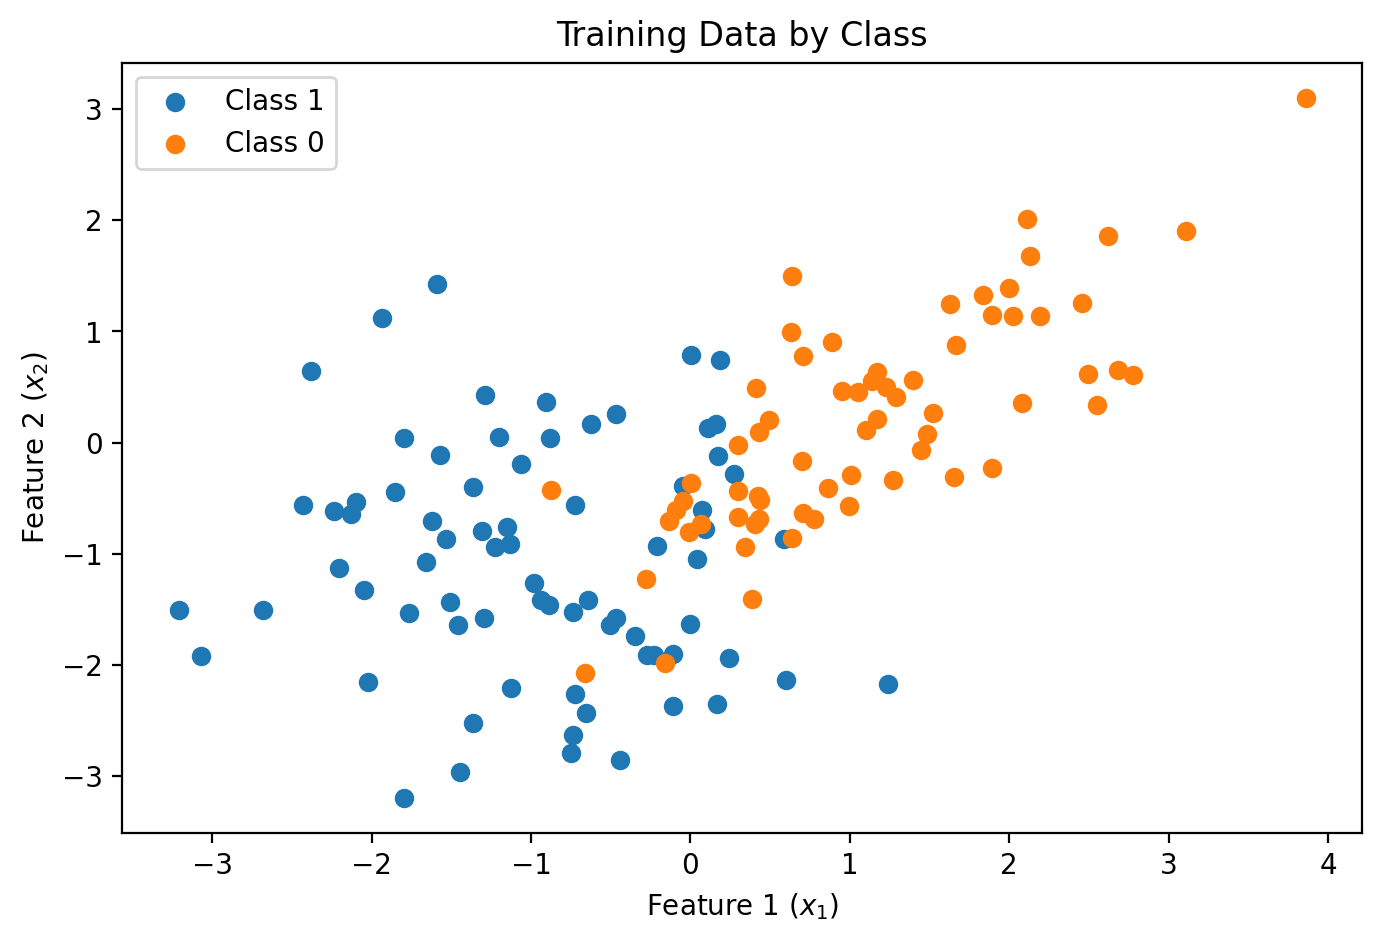

In [32]:
import matplotlib.pyplot as plt

# first, ensure X_train has an index that matches y_train
X_train_indexed = X_train.set_index(y_train.index)

plt.figure(figsize=(8, 5))

# iterate through each class to plot
for cls in y_train.unique():
    # select the subset of data belonging to the current class
    subset = X_train_indexed[y_train == cls]
    # plot the subset
    plt.scatter(subset["x1"], subset["x2"], label=f"Class {cls}")

plt.title("Training Data by Class")
plt.xlabel("Feature 1 ($x_1$)")
plt.ylabel("Feature 2 ($x_2$)")
plt.legend()
plt.show()

a)- Comment on the data: do the data appear separable? May logistic regression be a good choice for these data? Why or why not?

>Based on the scatter plot of the training data, the two classes (Class 0 and Class 1) appear to be somewhat linearly separable, though there is some overlap. Logistic regression could be a good starting point for modeling these data because it is a linear model that works well when the decision boundary between classes is approximately linear. The algorithm will try to find a linear decision boundary that best separates the two classes. From the scatter plot, it seems like a single straight line may be able to provide a reasonable separation between Class 0 and Class 1, although there may be some misclassifications due to the overlap.
However, logistic regression may not capture the full complexity of the dataset if the true relationship between the features and the class labels is not linear, or if there are more complex interactions between the features that a linear model cannot capture.

**(b)** Do the data require any preprocessing due to missing values, scale differences (e.g. different ranges of values), etc.? If so, how did you handle these issues?

In [33]:
# check for missing values
missing_values = A3_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 x1    0
x2    0
y     0
dtype: int64


>The dataset does not have any missing values in any of the columns ($x_1$, $x_2$, $y$). All columns have 0 missing entries, which means we do not need to perform any imputation or removal of missing data.

In [34]:
# check for scale differences without y (need modify)
scale_differences = A3_data.describe().loc[["mean", "std", "min", "max"]]
print("Scale differences in the data:\n", scale_differences)

Scale differences in the data:
             x1        x2         y
mean  0.151376 -0.385426  0.485000
std   1.411722  1.217490  0.501029
min  -3.210005 -3.193456  0.000000
max   3.867647  3.103541  1.000000


>The mean, standard deviation, minimize and maximize values for $x_1$ and $x_2$ suggest that the data varies very subtle in scale. In this case, it is not necessary to deal with this range difference in logistic regression.

### III. Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(c)** What is the likelihood function that corresponds to all the $N$ samples in our training dataset that we will wish to maximize? Unlike the likelihood function written above which gives the likelihood function for a *single training data pair* $(y_i, \mathbf{x}_i)$, this question asks for the likelihood function for the *entire training dataset* $\{(y_1, \mathbf{x}_1), (y_2, \mathbf{x}_2), ..., (y_N, \mathbf{x}_N)\}$. 

For a single training data pair $(y_i, \mathbf{x}_i)$, the $\sigma$ is

$$\sigma(\mathbf{w}^\top \mathbf{x}_i) = \frac{1}{1 + e^{-\mathbf{w}^\top \mathbf{x}_i}}$$

and the likelihood is given by:

$$L(\mathbf{w}|y_i, \mathbf{x}_i) = P(Y = y_i|X = \mathbf{x}_i; \mathbf{w})$$

In logistic regression, this function models the probability that the target variable $y_i$ is 1 given the feature vector $\mathbf{x}_i$:

$$P(y_i = 1|\mathbf{x}_i) = \sigma(\mathbf{w}^\top \mathbf{x}_i)$$

The probability that the target variable $y_i$ is 0 is the complement of the above probability:

$$P(y_i = 0|\mathbf{x}_i) = 1 - \sigma(\mathbf{w}^\top \mathbf{x}_i)$$

In this case, the binary $y_i$ can be combined as:

$$L(\mathbf{w}|y_i, \mathbf{x}_i) = P(y_i = 1|\mathbf{x}_i)^{y_i} P(y_i = 0|\mathbf{x}_i)^{1-y_i}$$

For entire training dataset $N$, the likelihood is given by:

$$L(\mathbf{w}|\mathbf{y}, \mathbf{X}) = \prod_{i=1}^{N} \left[ \sigma(\mathbf{w}^\top \mathbf{x}_i)^{y_i} \left(1 - \sigma(\mathbf{w}^\top \mathbf{x}_i)\right)^{1 - y_i} \right]$$

**(d)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express the likelihood from the last question as a cost function of the model parameters, $C(\mathbf{w})$; that is the negative of the logarithm of the likelihood. Express this cost as an average cost per sample (i.e. divide your final value by $N$), and use this quantity going forward as the cost function to optimize.


Given a binary outcome $y_i \in \{0, 1\}$, is typically the cross-entropy loss, also known as log loss. This is different from the Mean Squared Error (MSE) or Mean Absolute Error (MAE), which are more commonly used in regression tasks.

The predicted outcome $\hat{y}_i$ is the probability that $y_i = 1$ given the features $\mathbf{x}_i$, which is computed using the sigmoid function:

$$\hat{y}_i \triangleq \sigma(\mathbf{w}^\top \mathbf{x}_i)$$

In this case the cost function for binary classification is:

$$C(\mathbf{w}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

**(e)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$. 

To simplify notation, please use $\mathbf{w}^{\top}\mathbf{x}$ instead of writing out $w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ when it appears each time (where $x_{i,0} = 1$ for all $i$). You are also welcome to use $\sigma()$ to represent the sigmoid function. Lastly, this will be a function the features, $x_{i,j}$ (with the first index in the subscript representing the observation and the second the feature; targets, $y_i$; and the logistic regression model parameters, $w_j$.

Given the sigmoid function:
$$\sigma(\mathbf{w}^\top \mathbf{x}_i) = \frac{1}{1 + e^{-\mathbf{w}^\top \mathbf{x}_i}}$$

And the cost function for binary classification:
$$C(\mathbf{w}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\sigma(\mathbf{w}^\top \mathbf{x}_i)) + (1 - y_i) \log(1 - \sigma(\mathbf{w}^\top \mathbf{x}_i)) \right]$$

In this case, we can have the derivative of the sigmoid function, which is crucial for applying the chain rule:
$$\sigma'(z) = \sigma(z)(1 - \sigma(z))$$

For $y_i \log(\sigma(\mathbf{w}^\top \mathbf{x}_i))$:
$$\frac{\partial}{\partial w_j} \left( y_i \log(\sigma(\mathbf{w}^\top \mathbf{x}_i)) \right) = y_i \frac{1}{\sigma} \sigma'(z) x_{i,j}$$

For $(1 - y_i) \log(1 - \sigma(\mathbf{w}^\top \mathbf{x}_i))$:
$$\frac{\partial}{\partial w_j} \left( (1 - y_i) \log(1 - \sigma(\mathbf{w}^\top \mathbf{x}_i)) \right) = (1 - y_i) \frac{-1}{1 - \sigma} \sigma'(z) x_{i,j}$$


Combine both components to get the total derivative:

$$\frac{\partial C}{\partial w_j} = -\frac{1}{N} \sum_{i=1}^{N} \left( \frac{y_i}{\sigma} - \frac{1 - y_i}{1 - \sigma} \right) \sigma'(z) x_{i,j}$$


$$\frac{\partial C}{\partial w_j} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i (1 - \sigma) - (1 - y_i) \sigma \right) x_{i,j} = -\frac{1}{N} \sum_{i=1}^{N} (y_i - \sigma) x_{i,j} = \frac{1}{N} \sum_{i=1}^{N} (\sigma(\mathbf{w}^\top \mathbf{x}_i) - y_i) x_{i,j}$$

In this casem the gradient vector is:
$$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[ \frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2} \right] = \frac{1}{N} \sum_{i=1}^{N} (\sigma(\mathbf{w}^\top \mathbf{x}_i) - y_i) \mathbf{x}_i$$


**(f)** Write out the gradient descent update equation. This should clearly express how to update each weight from one step in gradient descent $w_j^{(k)}$ to the next $w_j^{(k+1)}$.  There should be one equation for each model logistic regression model parameter (or you can represent it in vectorized form). Assume that $\eta$ represents the learning rate.



Given the gradient vector:

$$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[ \frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2} \right]$$

$$\nabla_{\mathbf{w}}C(\mathbf{w}^{(k)}) = \frac{1}{N} \sum_{i=1}^{N} (\sigma(\mathbf{w}^{(k)^\top} \mathbf{x}_i) - y_i) \mathbf{x}_i$$

In this casem the update rule for each parameter $w_j$ at iteration $k$ to $k+1$ is ($\eta$ is learning rate):

$$w_j^{(k+1)} = w_j^{(k)} - \eta \frac{\partial C}{\partial w_j}$$

And in vectorized form is:

$$\mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} - \eta \nabla_{\mathbf{w}}C(\mathbf{w}^{(k)})$$

**(g)** Implement your logistic regression model.

In [35]:
# Logistic regression class

import numpy as np


class Logistic_regression:
    # Class constructor
    def __init__(self):
        self.w = None  # logistic regression weights
        self.saved_w = []  # Since this is a small problem, we can save the weights
        self.cost_old_train = []
        self.cost_old_test = []
        #  at each iteration of gradient descent to build our
        #  learning curves
        # returns nothing
        pass

    # Method for calculating the sigmoid function of w^T X for an input set of weights
    def sigmoid(self, X):
        z = np.dot(X, self.w)
        sigmoid_value = 1 / (1 + np.exp(-z))
        return sigmoid_value
        # returns the value of the sigmoid
        pass

    # Cost function for an input set of weights
    def cost(self, X, y):
        N = X.shape[0]
        y_hat = self.sigmoid(X)
        # compute the cross-entropy cost
        return -(1 / N) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        # returns the average cross entropy cost
        pass

    # Update the weights in an iteration of gradient descent
    def gradient_descent(self, X, y, lr):
        N = X.shape[0]
        y_hat = self.sigmoid(X)
        # compute the gradient of the cost function
        gradient = np.dot(X.T, (y_hat - y)) / N
        # step size for weight update
        step = lr * gradient
        self.w -= step  # update weights
        return np.linalg.norm(step)
        # returns a scalar of the magnitude of the Euclidean norm
        #  of the change in the weights during one gradient descent step
        pass

    # Fit the logistic regression model to the data through gradient descent
    def fit(
        self,
        X_train,
        y_train,
        X_test,
        y_test,
        lr,
        delta_thresh=1e-6,
        max_iter=5000,
        verbose=False,
    ):
        # Note the verbose flag enables you to print out the weights at each iteration
        #  (optional - but may help with one of the questions)
        self.w = np.random.rand(X_train.shape[1])
        for i in range(max_iter):
            norm = self.gradient_descent(
                X_train, y_train, lr
            )  # perform a gradient descent step and get weight change magnitude
            # update cost tracking after weight update
            if verbose:
                print(self.w)
            # self.saved_w.append(self.w.copy())  # save weights after each iteration
            self.cost_old_train.append(self.cost(X_train, y_train))
            self.cost_old_test.append(self.cost(X_test, y_test))
            self.saved_w.append(self.w.copy())
            # check for convergence: if the change in weights is small enough
            if norm < delta_thresh:
                break
        # returns nothing
        pass

    # Use the trained model to predict the confidence scores (prob of positive class in this case)
    def predict_proba(self, X):
        return self.sigmoid(X)
        # returns the confidence score for the each sample
        pass

    # Use the trained model to make binary predictions
    def predict(self, X, thresh=0.5):
        # Add a column of ones to X to account for the bias term
        X = self.prepare_x(X)

        # Calculate confidence scores (probabilities) using the predict_proba method
        confidence_scores = self.predict_proba(X)

        # Convert probabilities to binary predictions using the threshold
        predictions = (confidence_scores >= thresh).astype(int)
        return predictions

    # Returns a binary prediction for each sample

    # Stores the learning curves from saved weights from gradient descent
    def learning_curve(self):
        return self.cost_old_train, self.cost_old_test
        # returns the value of the cost function from each step in gradient descent
        #  from the last model fitting process
        pass

    # Appends a column of ones as the first feature to account for the bias term
    def prepare_x(self, X):
        # create a column of ones with the same number of rows as X
        ones_column = np.ones((X.shape[0], 1))
        # append the column of ones to the front of X
        X_new = np.hstack((ones_column, X))
        return X_new
        # returns the X with a new feature of all ones (a column that is the new column 0)
        pass

**(h)** Choose a learning rate and fit your model. Learning curves are a plot of metrics of model performance evaluated through the process of model training to provide insights about how model training is proceeding. Show the learning curves for the gradient descent process for learning rates of $\{10^{-0}, 10^{-2}, 10^{-4}\}$. For each learning rate plot the learning curves by plotting **both the training and test data average cost** as a function of each iteration of gradient descent. You should run the model fitting process until it completes (up to 5,000 iterations of gradient descent). All of the 6 resulting curves (train and test average cost for each learning rate) should be plotted on the **same set of axes** to enable direct comparison. *Note: make sure you're using average cost per sample, not the total cost*.
- Try running this process for a really big learning rate for this problem: $10^2$. Look at the weights that the fitting process generates over the first 50 iterations and how they change. Either print these first 50 iterations as console output or plot them. What happens? How does the output compare to that corresponding to a learning rate of $10^0$ and why?
- What is the impact that the different values of learning have on the speed of the process and the results? 
- Of the options explored, what learning rate do you prefer and why?
- Use your chosen learning rate for the remainder of this problem.

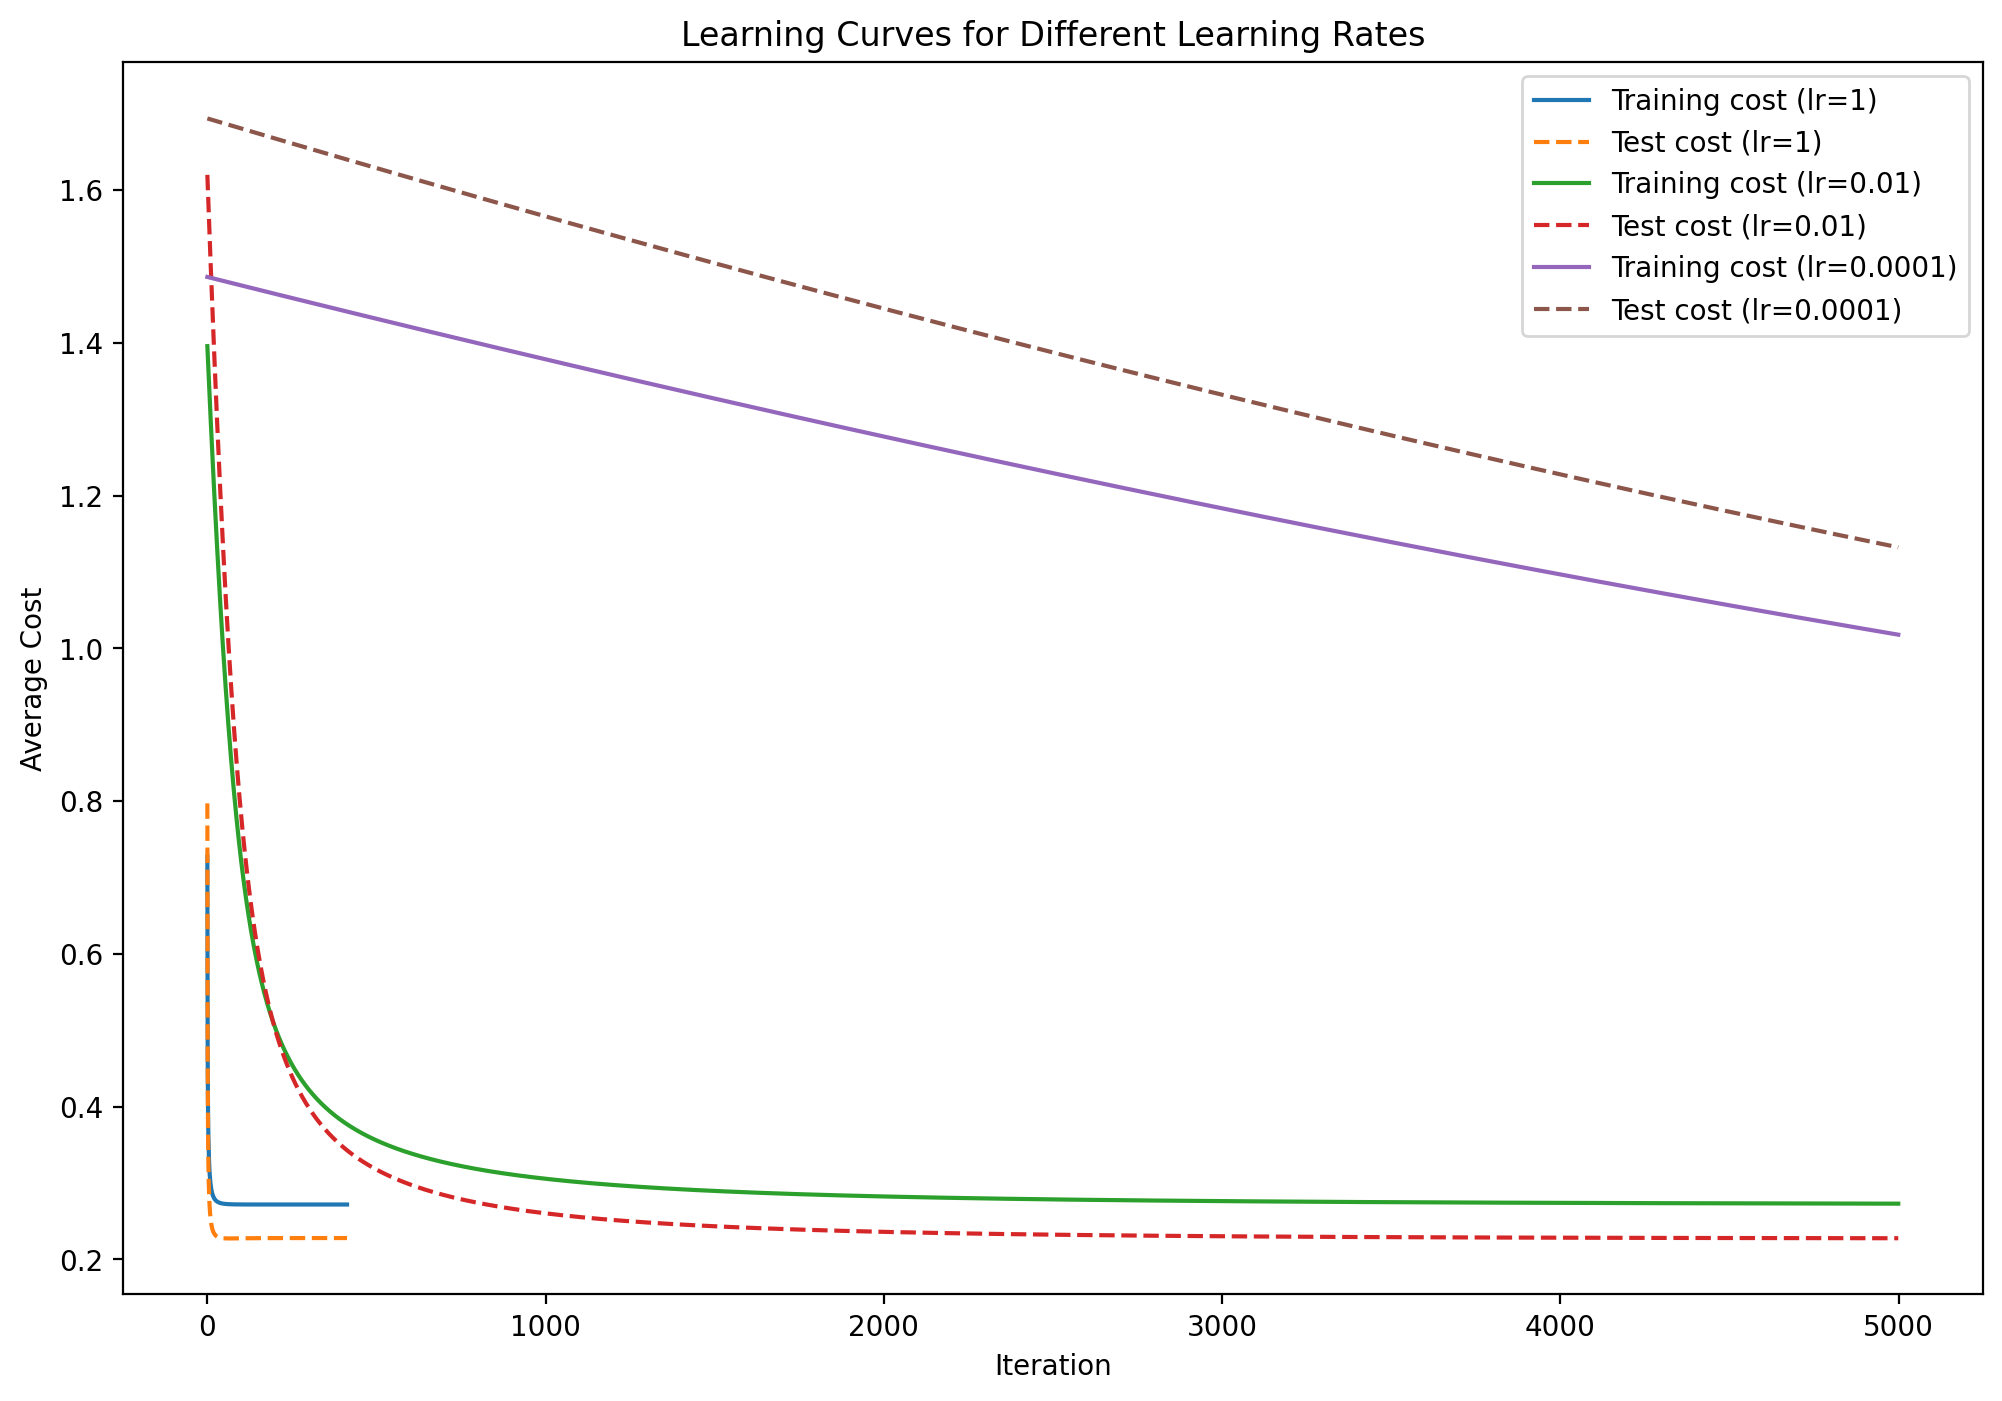

In [36]:
# define learning rates for experimentation
learning_rates = [1, 0.01, 0.0001]  # Including a very high learning rate for analysis

# dictionary to store cost data for different learning rates
curve_data = {}
# initialize the logistic regression model
prepare_model = Logistic_regression()

# prepare the training and test data by adding a bias term (a column of ones)
X_train_prepared = prepare_model.prepare_x(X_train)
X_test_prepared = prepare_model.prepare_x(X_test)

# convert labels to NumPy arrays for consistent data handling
y_train_prepared = y_train.to_numpy()
y_test_prepared = y_test.to_numpy()

# iterate over each learning rate to train the model and collect cost data
for lr in learning_rates:
    model = Logistic_regression()
    model.fit(
        X_train_prepared,
        y_train_prepared,
        X_test_prepared,
        y_test_prepared,
        lr=lr,
        max_iter=5000,
    )
    # retrieve the cost data for training and test sets from the model
    train_costs, test_costs = model.learning_curve()
    curve_data[lr] = (train_costs, test_costs)

# Plotting
plt.figure(figsize=(12, 8))
for lr, (train_costs, test_costs) in curve_data.items():
    iterations = range(1, len(train_costs) + 1)
    plt.plot(train_costs, label=f"Training cost (lr={lr})")
    plt.plot(test_costs, label=f"Test cost (lr={lr})", linestyle="--")

plt.xlabel("Iteration")
plt.ylabel("Average Cost")
plt.title("Learning Curves for Different Learning Rates")
plt.legend()
plt.show()

h) - Try running this process for a really big learning rate for this problem: $10^2$. Look at the weights that the fitting process generates over the first 50 iterations and how they change. Either print these first 50 iterations as console output or plot them. 

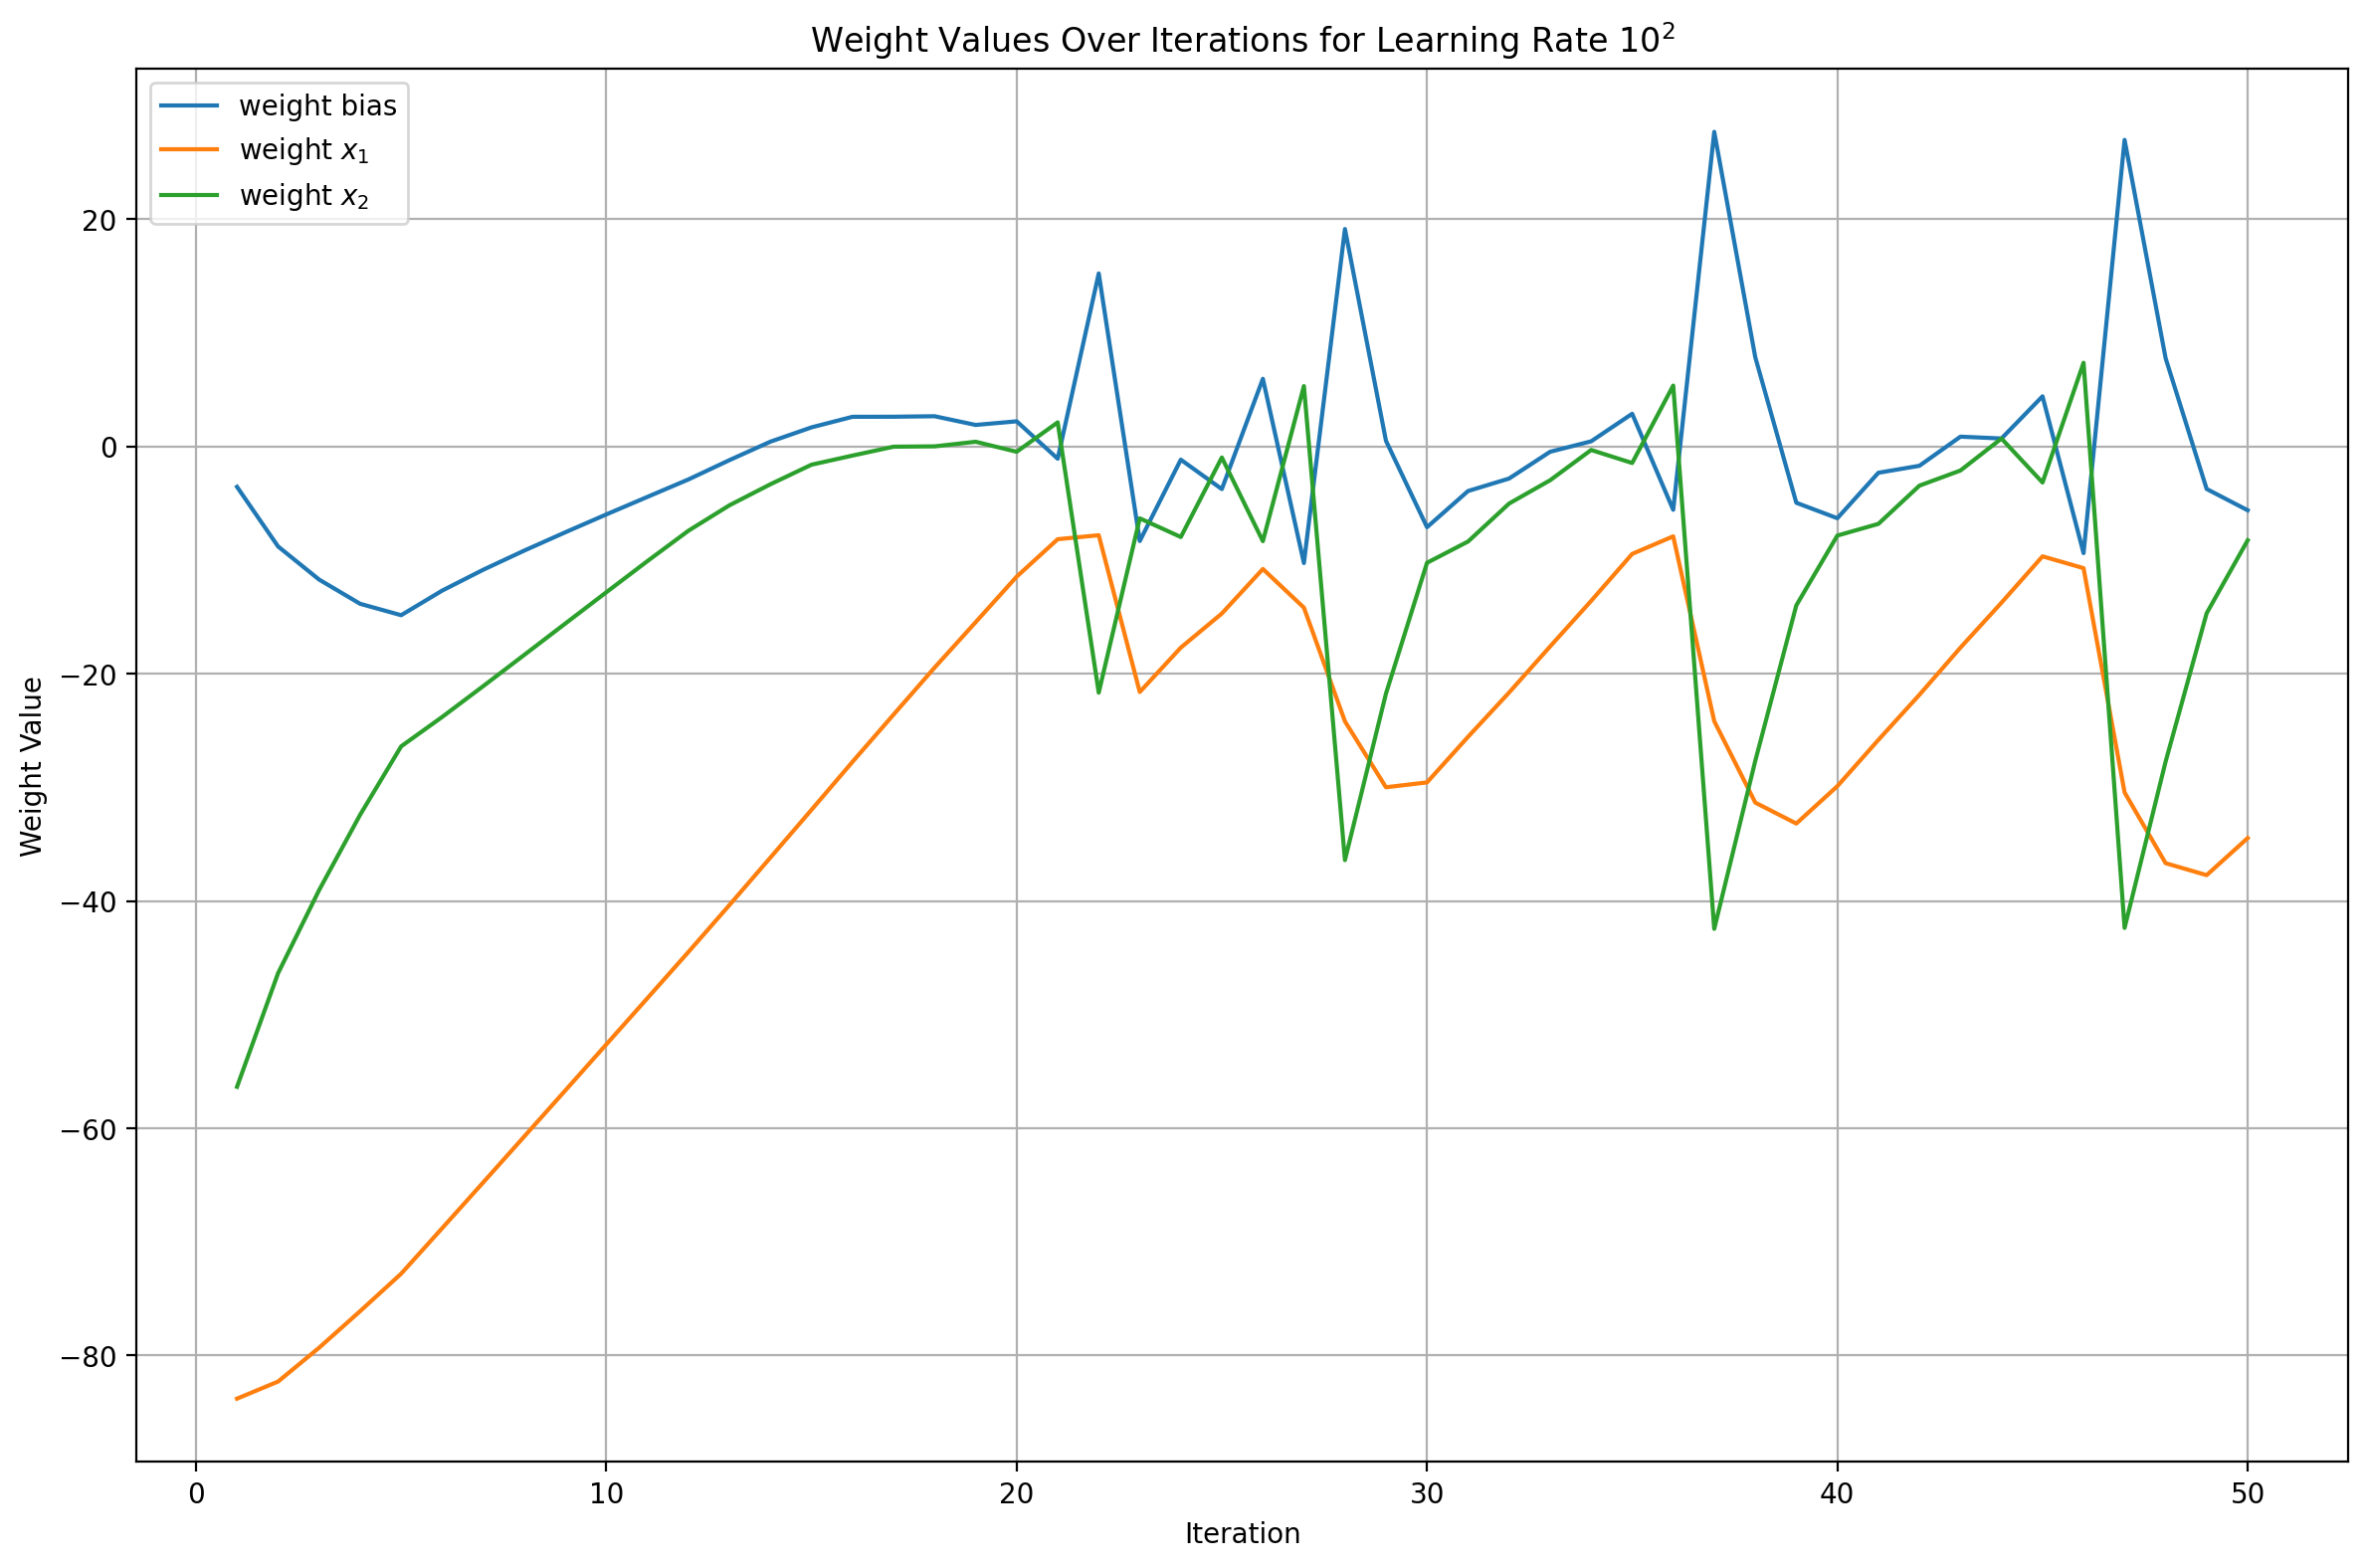

In [37]:
# experiment with high learning rate
high_lr = 100
high_lr_model = Logistic_regression()

# train the logistic regression model using the high learning rate
high_lr_model.fit(
    X_train_prepared,
    y_train_prepared,
    X_test_prepared,
    y_test_prepared,
    lr=high_lr,
    max_iter=50,
)
# convert the saved weights history to a NumPy array
w = np.array(high_lr_model.saved_w)
# extract individual weight components from the weights history
weight_bias = w[:, 0]
weight_x1 = w[:, 1]
weight_x2 = w[:, 2]

# plot
plt.figure(figsize=(12, 8))
plt.plot(range(1, 51), weight_bias, label="weight bias")
plt.plot(range(1, 51), weight_x1, label="weight $x_1$")
plt.plot(range(1, 51), weight_x2, label="weight $x_2$")
plt.legend()
plt.grid("on")
plt.xlabel("Iteration")
plt.ylabel("Weight Value")
plt.legend()
plt.title("Weight Values Over Iterations for Learning Rate $10^2$")
plt.tight_layout()
plt.show()

h) 
- What is the impact that the different values of learning have on the speed of the process and the results? 
- Of the options explored, what learning rate do you prefer and why?
- Use your chosen learning rate for the remainder of this problem.

> A high learning rate may lead to rapid but unstable convergence, often resulting in overshooting the optimal solution. Conversely, a low learning rate ensures steady progress and finer adjustments towards an optimal fit, though it may slow down the training process. In this case, I prefer to choose learning rate like $10^{0}, 10^{-2},10^{-4}$. In general, I prefer to choose a learning rate equal or lower than $10^0$ to demonstrate a balance between convergence speed and stability of the gradient descent.

**(i)** Test the performance of your trained classifier using K-folds cross validation resampling technique. The scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful. 
- Train your logistic regression model and a K-Nearest Neighbor classification model with $k=7$ nearest neighbors.
- Using the trained models, make four plots: two for logistic regression and two for KNN. For each model have one plot showing the training data used for fitting the model, and the other showing the test data. On each plot, include the decision boundary resulting from your trained classifier.
- Produce a Receiver Operating Characteristic curve (ROC curve) that represents the performance from cross validated performance evaluation for each classifier (your logistic regression model and the KNN model, with $k=7$ nearest neighbors). For the cross validation, use $k=10$ folds. 
  - Plot these curves on the same set of axes to compare them. You should not plot one curve for each fold of k-folds; instead, you should plot one ROC curve for Logistic Regression and one for KNN (each should incorporate all 10 folds of validation). Also, don't forget to plot the "chance" line.
  - On the ROC curve plot, also include the chance diagonal for reference (this represents the performance of the worst possible classifier). This is represented as a line from $(0,0)$ to $(1,1)$.
  - Calculate the Area Under the Curve for each model and include this measure in the legend of the ROC plot.
- Comment on the following:
  - What is the purpose of using cross validation for this problem?
  - How do the models compare in terms of performance (both ROC curves and decision boundaries) and which model (logistic regression or KNN) would you select to use on previously unseen data for this problem and why?

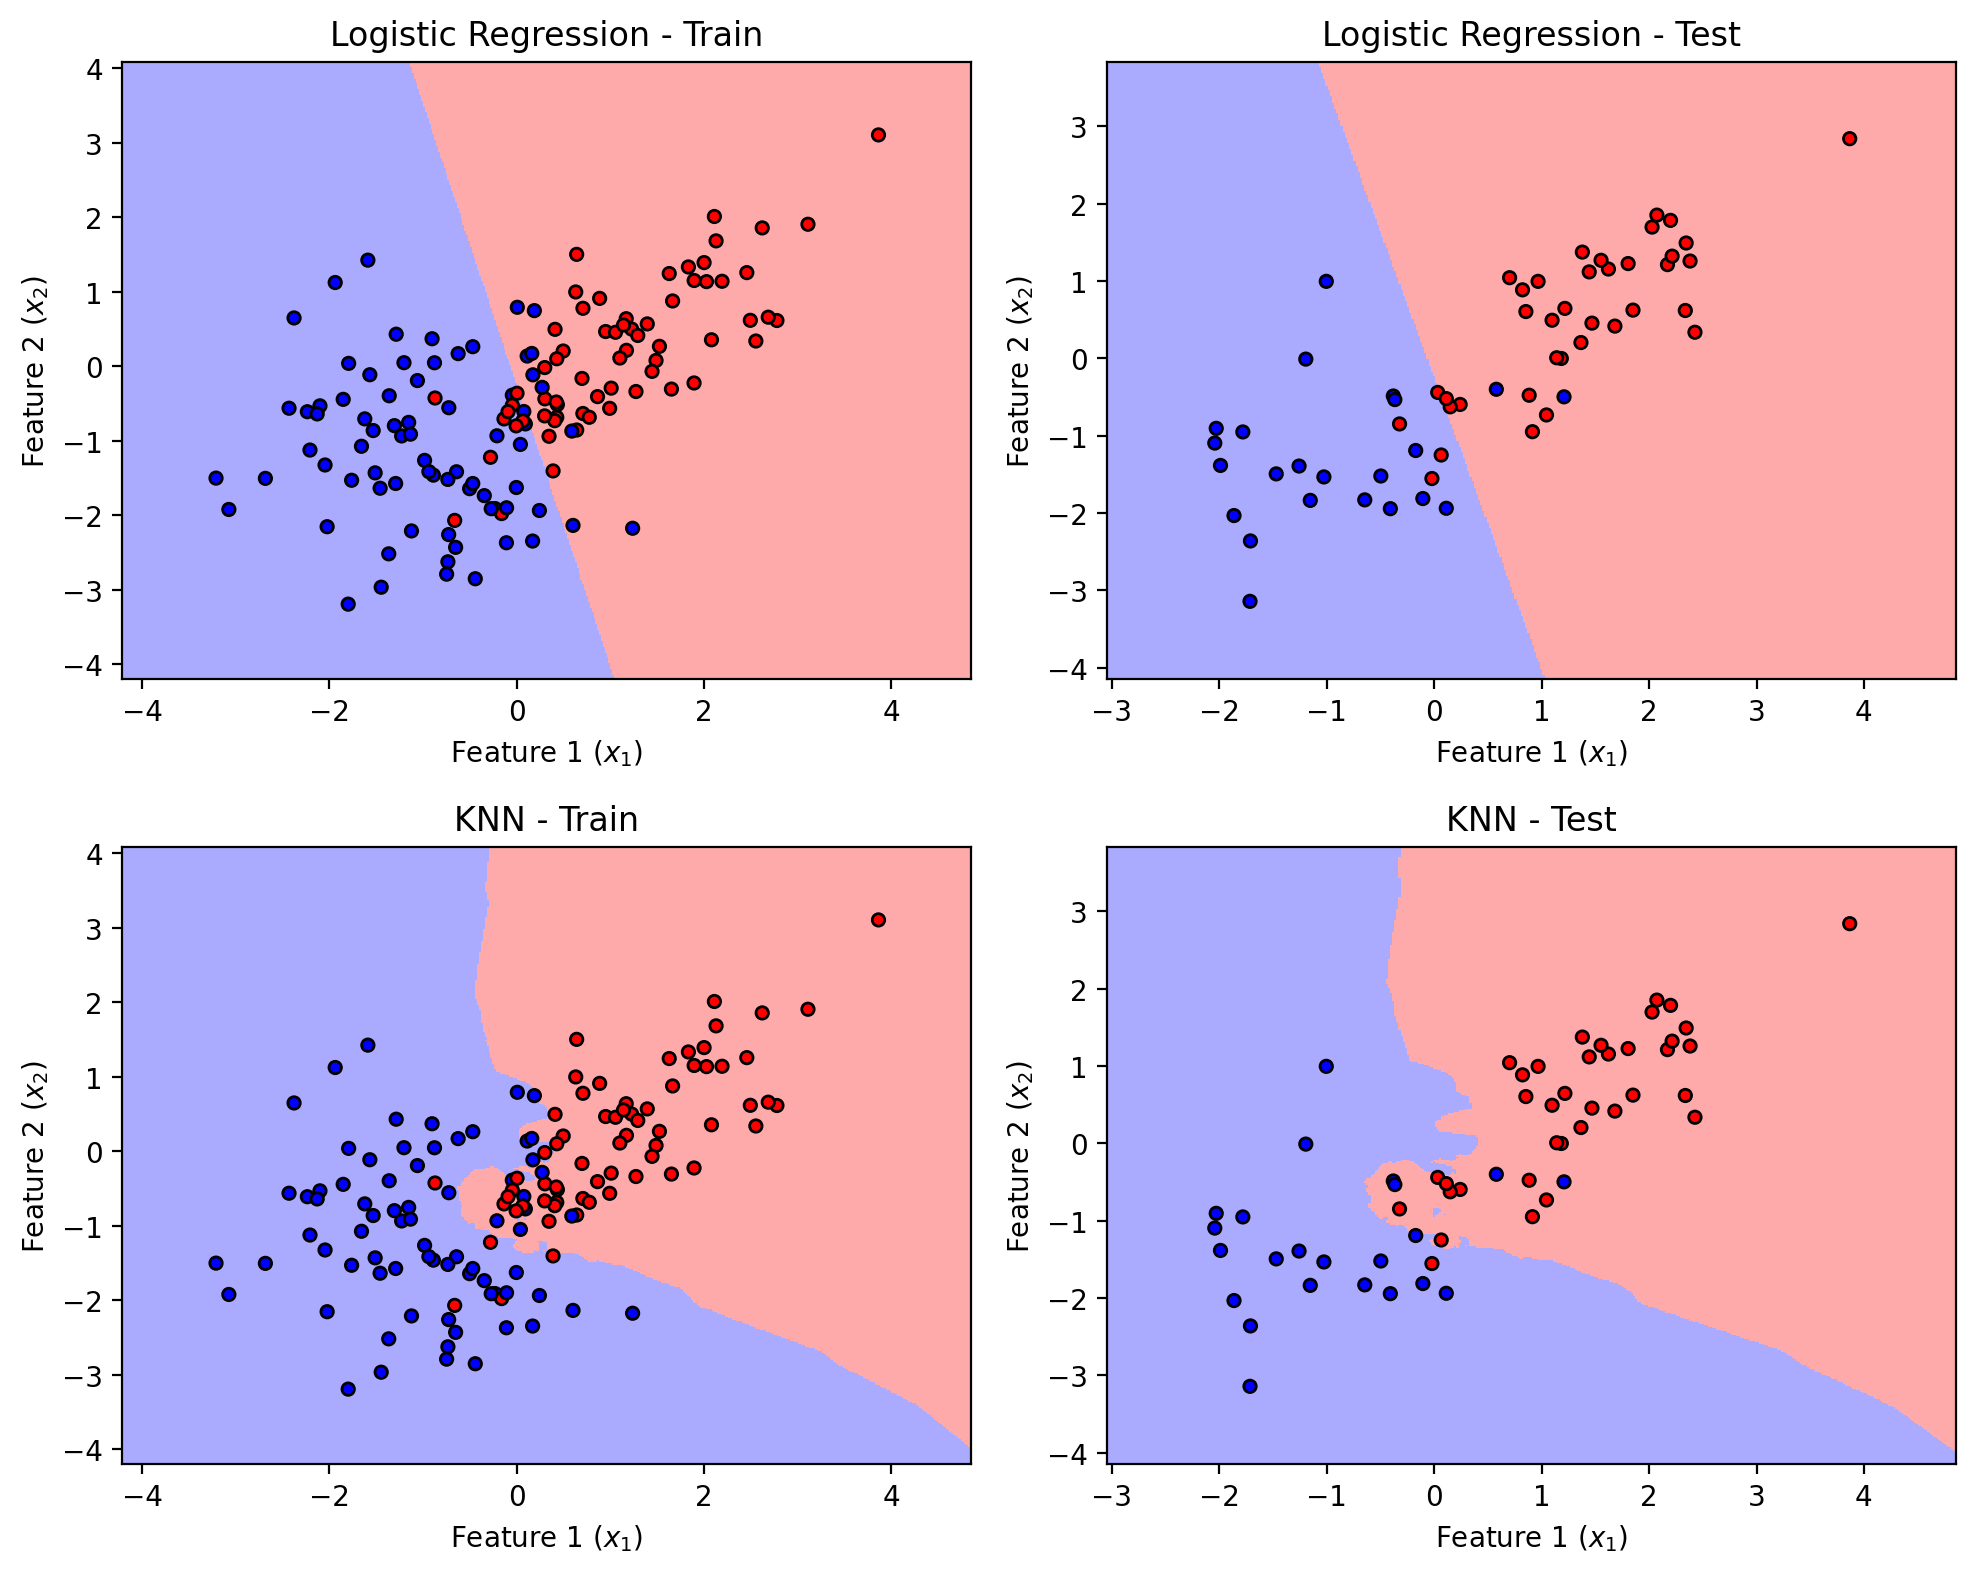

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from matplotlib.colors import ListedColormap

# Initialize models
log_reg = Logistic_regression()
knn = KNeighborsClassifier(n_neighbors=7)

# Fit models
log_reg.fit(
    X_train_prepared, y_train_prepared, X_test_prepared, y_test_prepared, lr=1e-2
)
knn.fit(X_train_prepared[:, 1:], y_train_prepared)


def plot_decision_boundaries(X, y, classifier, plot_title, ax):
    h = 0.02  # step size in the mesh

    # Check if X has a bias term, if not, add it
    if X.shape[1] == 2:
        X = np.hstack((np.ones((X.shape[0], 1)), X))

    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    mesh_data = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]

    Z = classifier.predict(mesh_data[:, 1:])  # Exclude bias term
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]))

    ax.scatter(
        X[:, 1],
        X[:, 2],
        c=y,
        cmap=ListedColormap(["#FF0000", "#0000FF"]),
        edgecolor="k",
        s=20,
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(plot_title)
    ax.set_xlabel("Feature 1 ($x_1$)")
    ax.set_ylabel("Feature 2 ($x_2$)")


# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot decision boundaries for Logistic Regression
plot_decision_boundaries(
    X_train_prepared,
    y_train_prepared,
    log_reg,
    "Logistic Regression - Train",
    axs[0, 0],
)
plot_decision_boundaries(
    X_test_prepared, y_test_prepared, log_reg, "Logistic Regression - Test", axs[0, 1]
)

# Plot decision boundaries for KNN - Adjust X to exclude the bias term if present
plot_decision_boundaries(
    X_train_prepared[:, 1:],
    y_train_prepared,
    knn,
    "KNN - Train",  # Exclude bias term
    axs[1, 0],
)
plot_decision_boundaries(
    X_test_prepared[:, 1:],
    y_test_prepared,
    knn,
    "KNN - Test",  # Exclude bias term
    axs[1, 1],
)

plt.tight_layout()
plt.show()

>

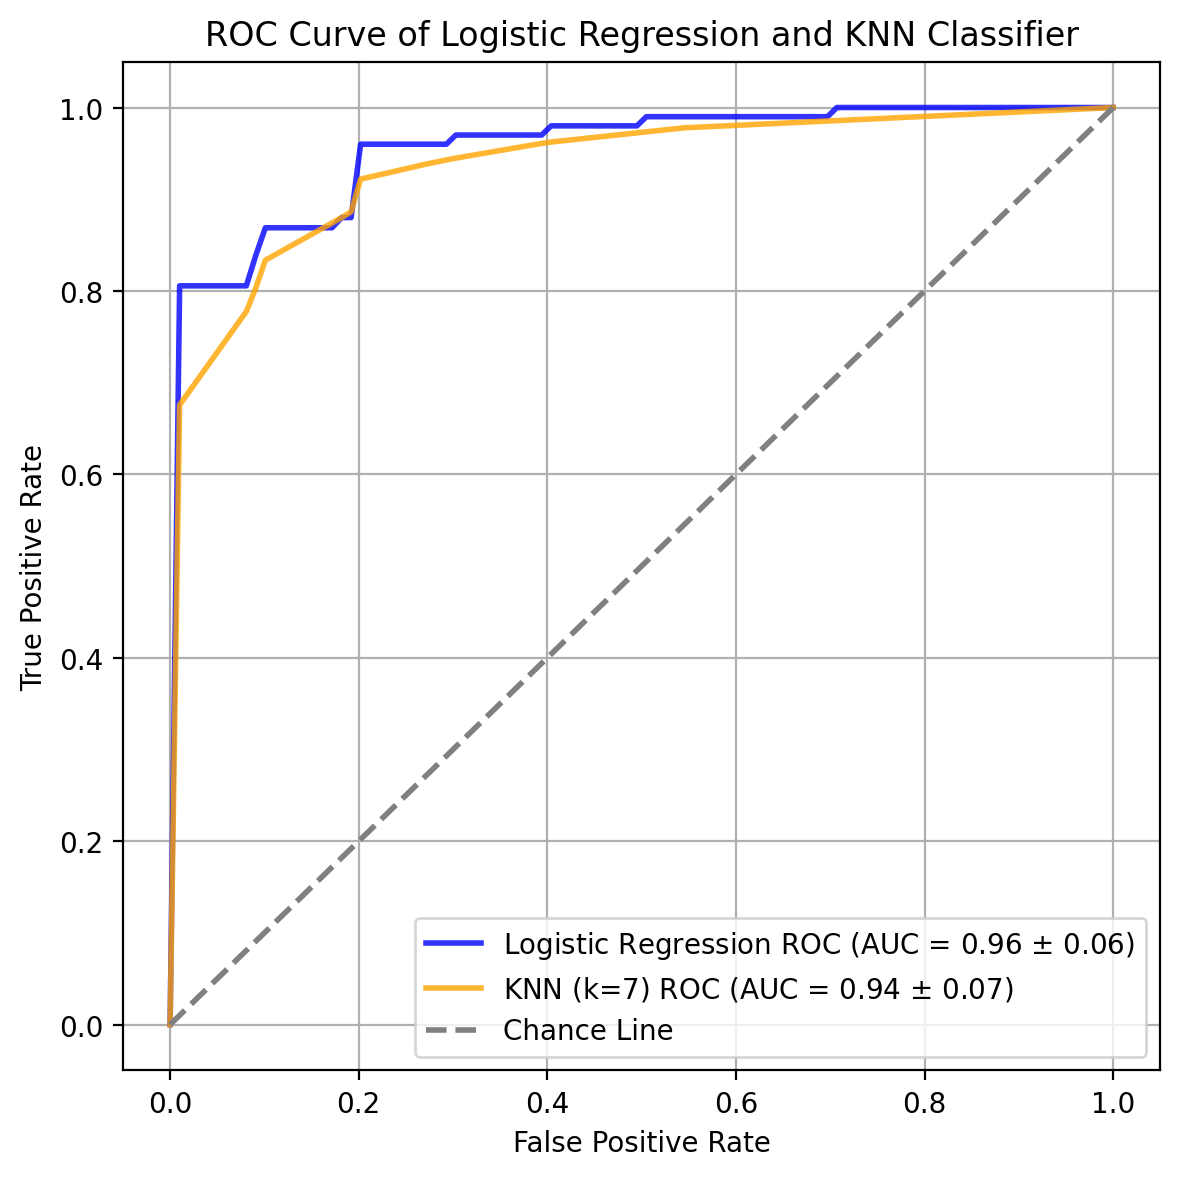

In [39]:
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
curve_data = StratifiedKFold(n_splits=10)
mean_fpr = np.linspace(0, 1, 100)
lr = 1
tprs_lg, tprs_knn, aucs_lg, aucs_knn = [], [], [], []

# Prepare data
X = log_reg.prepare_x(A3_data.iloc[:, :-1].to_numpy())
y = A3_data.iloc[:, -1].to_numpy()

# Iterate over folds for cross-validation
for train, test in curve_data.split(X, y):
    # Train logistic regression classifier
    log_reg.fit(X[train], y[train], X[test], y[test], lr=lr)
    probas_log_reg = log_reg.predict_proba(X[test])

    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X[train][:, 1:], y[train])
    probas_knn = knn.predict_proba(X[test][:, 1:])[:, 1]

    # Compute ROC curve and area under the curve for Logistic Regression
    fpr_log, tpr_log, _ = roc_curve(y[test], probas_log_reg)
    tprs_lg.append(np.interp(mean_fpr, fpr_log, tpr_log))
    tprs_lg[-1][0] = 0.0
    aucs_lg.append(auc(fpr_log, tpr_log))

    # Compute ROC curve and area under the curve for KNN
    fpr_knn, tpr_knn, _ = roc_curve(y[test], probas_knn)
    tprs_knn.append(np.interp(mean_fpr, fpr_knn, tpr_knn))
    tprs_knn[-1][0] = 0.0
    aucs_knn.append(auc(fpr_knn, tpr_knn))

# Compute mean and standard deviation for ROC curves and AUCs
mean_tpr_log = np.mean(tprs_lg, axis=0)
mean_tpr_knn = np.mean(tprs_knn, axis=0)
mean_tpr_log[-1] = 1.0
mean_tpr_knn[-1] = 1.0

mean_auc_log, std_auc_log = np.mean(aucs_lg), np.std(aucs_lg)
mean_auc_knn, std_auc_knn = np.mean(aucs_knn), np.std(aucs_knn)

# Plot ROC curves
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)

plt.plot(
    mean_fpr,
    mean_tpr_log,
    color="blue",  # Change the color for Logistic Regression ROC
    label=f"Logistic Regression ROC (AUC = {mean_auc_log:.2f} $\pm$ {std_auc_log:.2f})",
    lw=2,
    alpha=0.8,
)

plt.plot(
    mean_fpr,
    mean_tpr_knn,
    color="orange",  # Change the color for KNN ROC
    label=f"KNN (k=7) ROC (AUC = {mean_auc_knn:.2f} $\pm$ {std_auc_knn:.2f})",
    lw=2,
    alpha=0.8,
)

plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--", label="Chance Line")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Logistic Regression and KNN Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


- What is the purpose of using cross validation for this problem?

>Cross-validation is employed to ensure the reliability of the model across various subsets of data, which helps in preventing the model from overfitting to a specific portion of the training data. This process provides a more accurate and generalized estimate of the model's performance when it is applied to unseen data.

  - How do the models compare in terms of performance (both ROC curves and decision boundaries) and which model (logistic regression or KNN) would you select to use on previously unseen data for this problem and why?

>The comparison between the logistic regression and K-Nearest Neighbors (KNN) models, as visualized in the decision boundary and ROC curve plots, indicates that logistic regression has a slight edge in performance. Specifically, the logistic regression model exhibits a marginally higher Area Under the ROC Curve (AUC), suggesting better discriminative power between the classes. Additionally, the decision boundary for logistic regression appears more definitive and less prone to overfitting compared to that of the KNN model. Therefore, for future predictions on unseen data, logistic regression would be the preferred choice due to its robustness and slightly superior classification ability as evidenced by the cross-validation results.

# 2

## Digits classification
**[30 points]**

*An exploration of regularization, imbalanced classes, ROC and PR curves*

The goal of this exercise is to apply your supervised learning skills on a very different dataset: in this case, image data; MNIST: a collection of images of handwritten digits. Your goal is to train a classifier that is able to distinguish the number "3" from all possible numbers and to do so as accurately as possible. You will first explore your data (this should always be your starting point to gain domain knowledge about the problem.). Since the feature space in this problem is 784-dimensional, overfitting is possible. To avoid overfitting you will investigate the impact of regularization on generalization performance (test accuracy) and compare regularized and unregularized logistic regression model test error against other classification techniques such as linear discriminant analysis and random forests and draw conclusions about the best-performing model.

Start by loading your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, using the code provided below. MNIST has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to classify whether or not an example digit is a 3. Your binary classifier should predict $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format (3's are class 1, and all other digits are class 0). 


**(a)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.
- Note that the data are composed of samples of length 784. These represent 28 x 28 images, but have been reshaped for storage convenience. To plot digit examples, you'll need to reshape the data to be 28 x 28 (which can be done with numpy `reshape`).

**(b)** How many examples are present in each class? Show a plot of samples by class (bar plot). What fraction of samples are positive? What issues might this cause?

**(c)** Identify the value of the regularization parameter that optimizes model performance on out-of-sample data. Using a logistic regression classifier, apply lasso regularization and retrain the model and evaluate its performance on the test set over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. Vary the value of C logarithmically from $10^{-4}$ to $10^4$ (and make your x-axes logarithmic in scale) and evaluate it at least 20 different values of C. As you vary the regularization coefficient, Plot the following four quantities (this should result in 4 separate plots)... 
- The number of model parameters that are estimated to be nonzero (in the logistic regression model, one attribute is `coef_`, which gives you access to the model parameters for a trained model)
- The cross entropy loss (which can be evaluated with the Scikit Learn `log_loss` function)
- Area under the ROC curve (AUC)
- The $F_1$-score (assuming a threshold of 0.5 on the predicted confidence scores, that is, scores above 0.5 are predicted as Class 1, otherwise Class 0). Scikit Learn also has a `f1_score` function which may be useful.
-Which value of C seems best for this problem? Please select the closest power of 10. You will use this in the next part of this exercise.

**(d)** Train and test a (1) logistic regression classifier with minimal regularization (using the Scikit Learn package, set penalty='l1', C=1e100 to approximate this), (2) a logistic regression classifier with the best value of the regularization parameter from the last section, (3) a Linear Discriminant Analysis (LDA) Classifier, and (4) a Random Forest (RF) classifier (using default parameters for the LDA and RF classifiers). 
- Compare your classifiers' performance using ROC and Precision Recall (PR) curves. For the ROC curves, all your curves should be plotted on the same set of axes so that you can directly compare them. Please do the same wih the PR curves.
- Plot the line that represents randomly guessing the class (50% of the time a "3", 50% not a "3"). You SHOULD NOT actually create random guesses. Instead, you should think through the theory behind how ROC and PR curves work and plot the appropriate lines. It's a good practice to include these in ROC and PR curve plots as a reference point.
- For PR curves, an excellent resource on how to correctly plot them can be found [here](https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/) (ignore the section on "non-linear interpolation between two points"). This describes how a random classifier is represented in PR curves and demonstrates that it should provide a lower bound on performance.
- When training your logistic regression model, it's recommended that you use solver="liblinear"; otherwise, your results may not converge.
- Describe the performance of the classifiers you compared. Did the regularization of the logistic regression model make much difference here? Which classifier you would select for application to unseen data.

In [40]:
# # Load the MNIST Data
# from sklearn.datasets import fetch_openml
# from sklearn.model_selection import train_test_split
# import numpy as np
# import matplotlib.pyplot as plt
# import pickle

# # Set this to True to download the data for the first time and False after the first time
# #   so that you just load the data locally instead
# download_data = True

# if download_data:
#     # Load data from https://www.openml.org/d/554
#     X, y = fetch_openml("mnist_784", return_X_y=True, as_frame=False)

#     # Adjust the labels to be '1' if y==3, and '0' otherwise
#     y[y != "3"] = 0
#     y[y == "3"] = 1
#     y = y.astype("int")

#     # Divide the data into a training and test split
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=1 / 7, random_state=88
#     )

#     file = open("tmpdata", "wb")
#     pickle.dump((X_train, X_test, y_train, y_test), file)
#     file.close()
# else:
#     file = open("tmpdata", "rb")
#     X_train, X_test, y_train, y_test = pickle.load(file)
#     file.close()

**ANSWER**

**(a)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.
- Note that the data are composed of samples of length 784. These represent 28 x 28 images, but have been reshaped for storage convenience. To plot digit examples, you'll need to reshape the data to be 28 x 28 (which can be done with numpy `reshape`).

In [41]:
# Load the MNIST Data
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Set this to True to download the data for the first time and False after the first time
#   so that you just load the data locally instead
download_data = True

if download_data:
    # Load data from https://www.openml.org/d/554
    X, y = fetch_openml("mnist_784", return_X_y=True, as_frame=False)

    # Adjust the labels to be '1' if y==3, and '0' otherwise
    y[y != "3"] = 0
    y[y == "3"] = 1
    y = y.astype("int")

    # Divide the data into a training and test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=1 / 7, random_state=88
    )

    file = open("tmpdata", "wb")
    pickle.dump((X_train, X_test, y_train, y_test), file)
    file.close()
else:
    file = open("tmpdata", "rb")
    X_train, X_test, y_train, y_test = pickle.load(file)
    file.close()

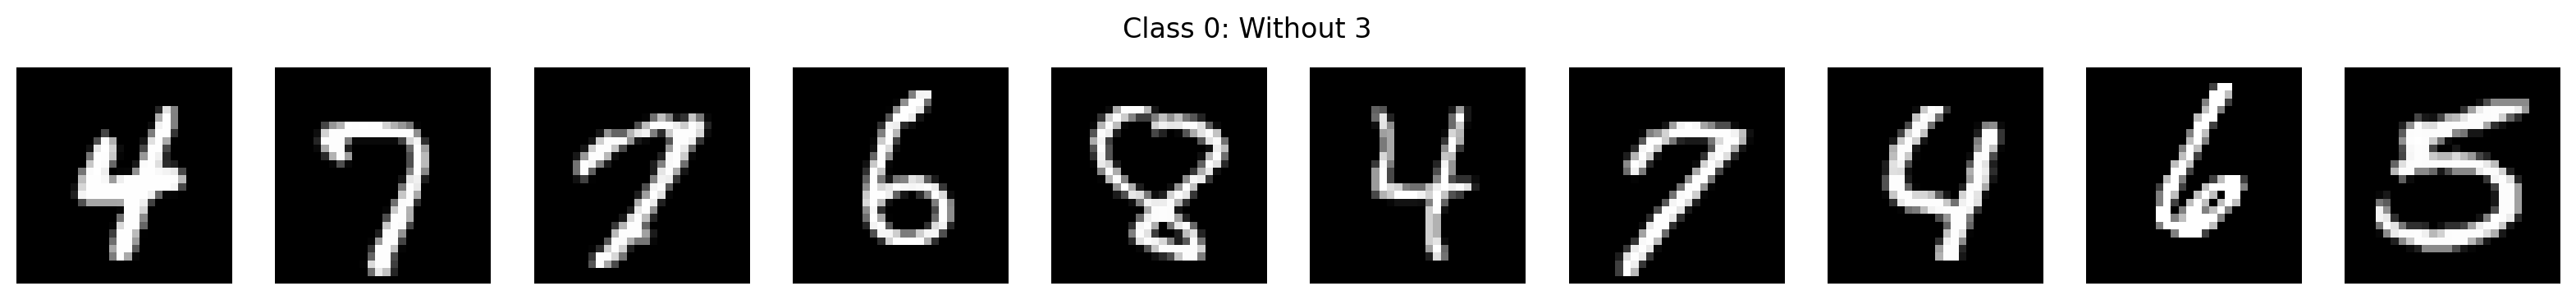

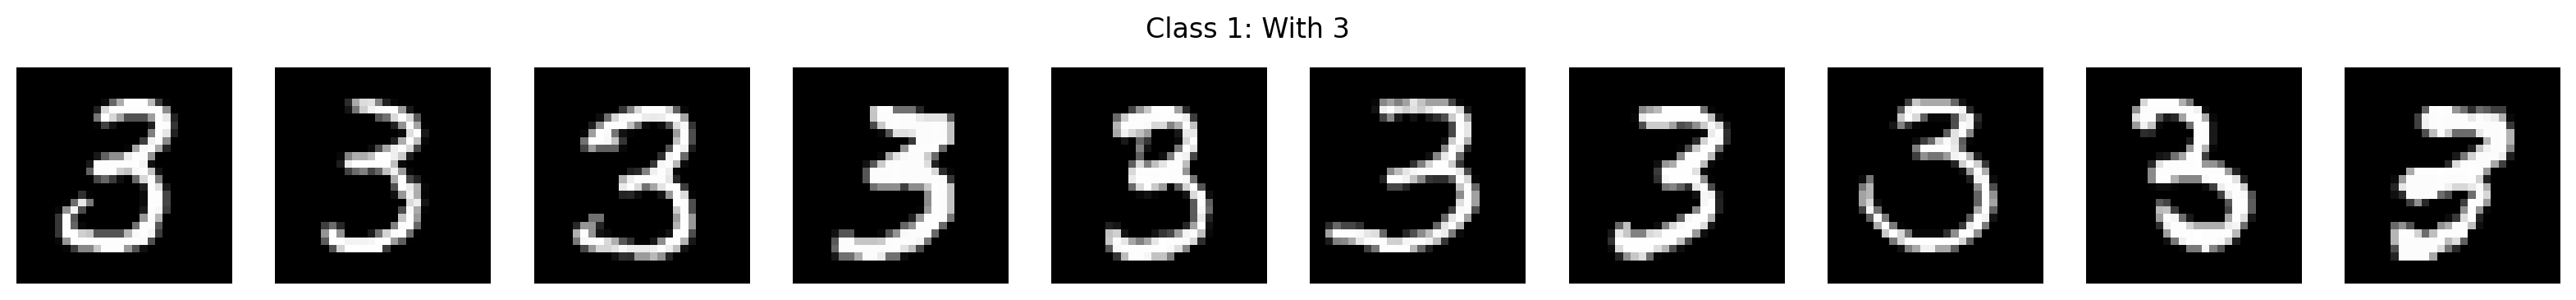

In [42]:
def plot_digits_examples(X, y, class_label, examples_per_class=10):
    """
    Plots 10 examples of a given class with a black background and white digits,
    explicitly using numpy's reshape function.

    Parameters:
    - X: numpy array, the features of the dataset.
    - y: numpy array, the labels of the dataset.
    - class_label: int, the class label to plot (1 for '3's, 0 for 'not 3's).
    - examples_per_class: int, number of examples to plot per class.
    """
    # filter the images for the specified class
    bool_idx = y == class_label
    X_filtered = X[bool_idx]

    # randomly select examples
    rand_indices = np.random.choice(
        X_filtered.shape[0], examples_per_class, replace=False
    )
    X_examples = X_filtered[rand_indices]

    # plot
    fig, axes = plt.subplots(1, examples_per_class, figsize=(20, 2))
    for i, ax in enumerate(axes.flat):
        # explicitly use numpy's reshape function here
        image = np.reshape(X_examples[i], newshape=(28, 28))
        ax.imshow(-image, cmap="gray_r")
        ax.axis("off")
    # specify the class in the title
    if class_label == 0:
        title = "Class 0: Without 3"
    else:
        title = "Class 1: With 3"
    plt.suptitle(title)
    plt.show()


# Plot 10 examples of class y=0 (not 3's)
plot_digits_examples(X_train, y_train, class_label=0)

# Plot 10 examples of class y=1 (3's)
plot_digits_examples(X_train, y_train, class_label=1)

**(b)** How many examples are present in each class? Show a plot of samples by class (bar plot). What fraction of samples are positive? What issues might this cause?

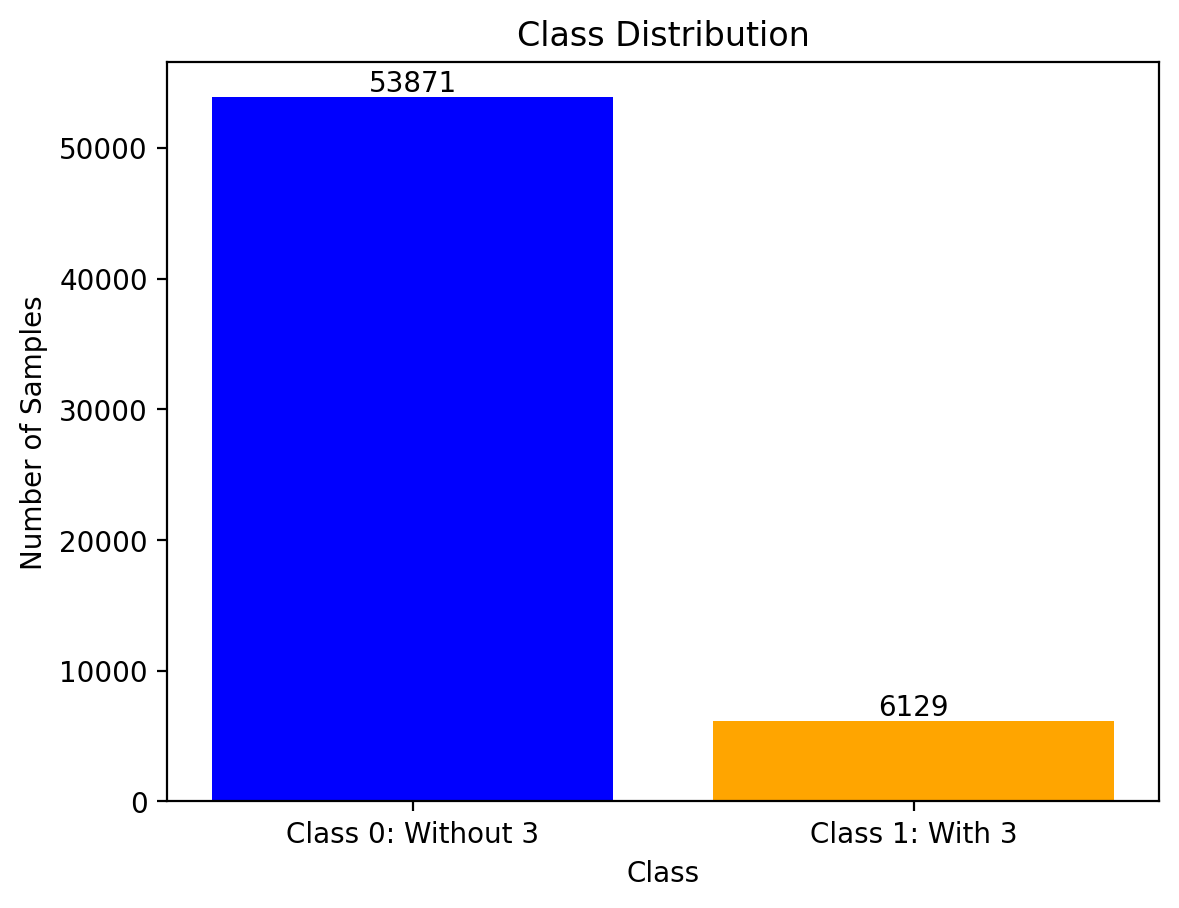

Number of samples in Class 0 without 3: 53871
Number of samples in Class 1 with 3: 6129
Fraction of positive samples (class '3'): 0.1022


In [43]:
num_samples_per_class = np.bincount(y_train)

# Plotting
classes = [0, 1]  # 0 for 'not 3', 1 for '3'
bars = plt.bar(classes, num_samples_per_class, color=["blue", "orange"])
plt.xticks(classes, ["Class 0: Without 3", "Class 1: With 3"])
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
# Adding the exact number above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        "%d" % int(height),
        ha="center",
        va="bottom",
    )
plt.show()

print(f"Number of samples in Class 0 without 3: {sum(y_train == 0)}")
print(f"Number of samples in Class 1 with 3: {sum(y_train == 1)}")

# calculate and print the fraction of positive samples
fraction_positive = num_samples_per_class[1] / sum(num_samples_per_class)
print(f"Fraction of positive samples (class '3'): {fraction_positive:.4f}")

>The fraction of positive samples, which are images of the digit '3', is approximately 10.22% of the total dataset. This indicates that the dataset is imbalanced, with a significant majority of the samples belonging to Class 0 (not '3'). An imbalanced dataset, with a majority of samples not being '3', can cause model bias towards predicting the majority class, inaccurately high accuracy metrics, poor performance on the minority class ('3'), and a trade-off between precision and recall for detecting '3's.

**(c)** Identify the value of the regularization parameter that optimizes model performance on out-of-sample data. 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you have X_train, X_test, y_train, y_test defined

# define C values
C_values = np.logspace(-4, 4, 20)

# initialize lists to store metrics
nonzero_params = []
cross_entropy_losses = []
auc_scores = []
f1_scores = []

In [45]:
# Loop over different regularization parameters
for C in C_values:
    # Create Logistic Regression model with L1 penalty
    lr = LogisticRegression(penalty="l1", C=C, solver="liblinear")

    # Fit the model on the training data
    lr.fit(X_train, y_train)

    # Predict probabilities and class labels on the test data
    y_pred_proba = lr.predict_proba(X_test)[:, 1]
    y_pred = lr.predict(X_test)

    # Evaluate and store metrics
    nonzero_params.append(np.sum(lr.coef_ != 0))
    cross_entropy_losses.append(log_loss(y_test, y_pred_proba))
    auc_scores.append(roc_auc_score(y_test, y_pred_proba))
    f1_scores.append(f1_score(y_test, y_pred))

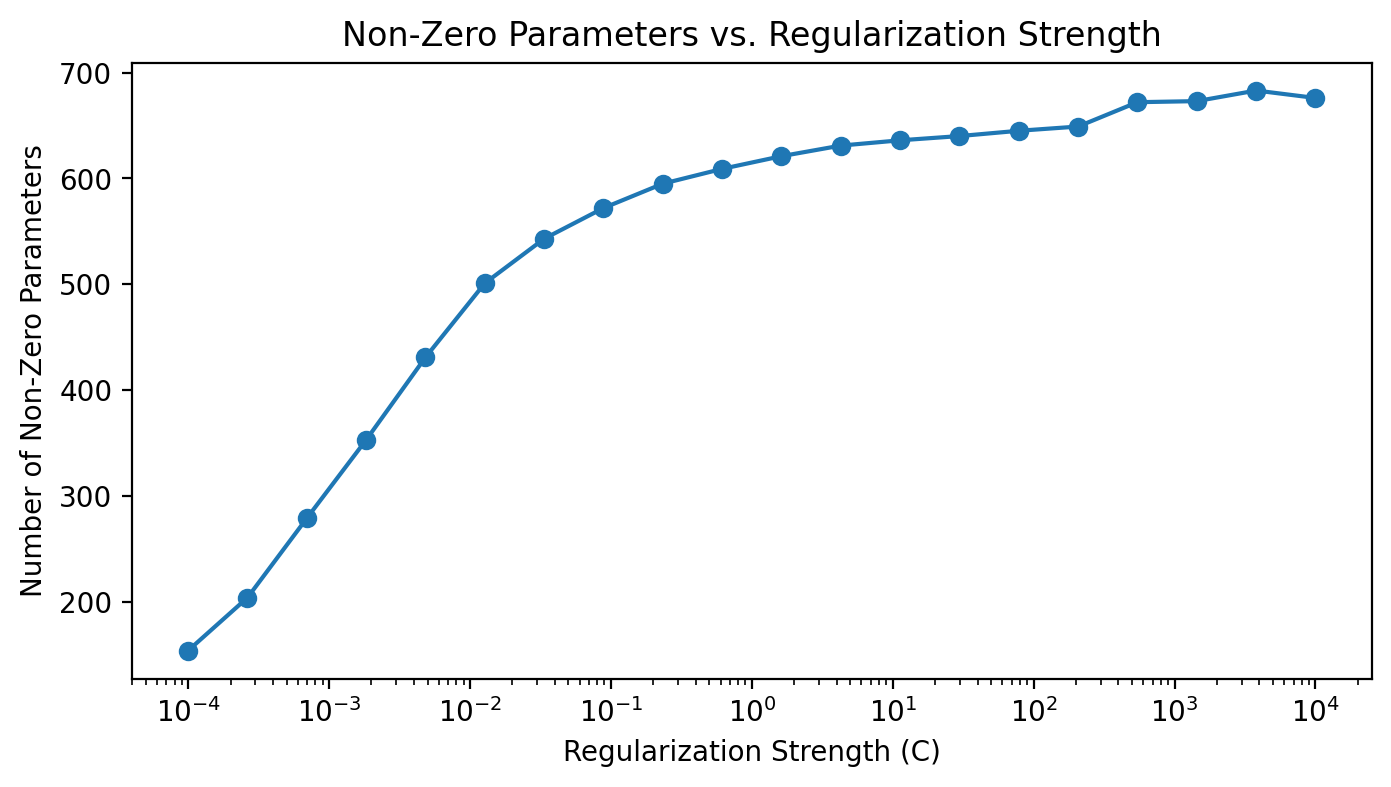

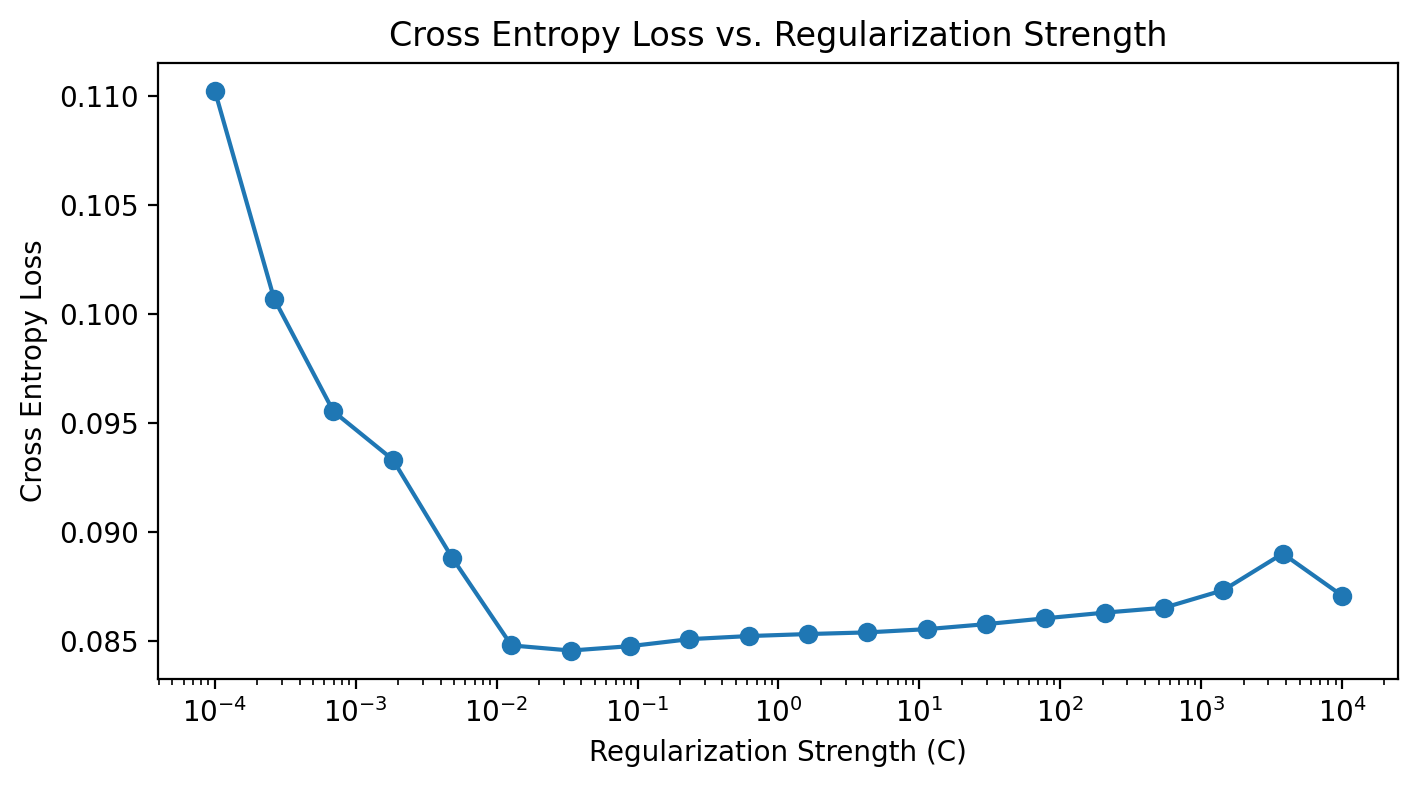

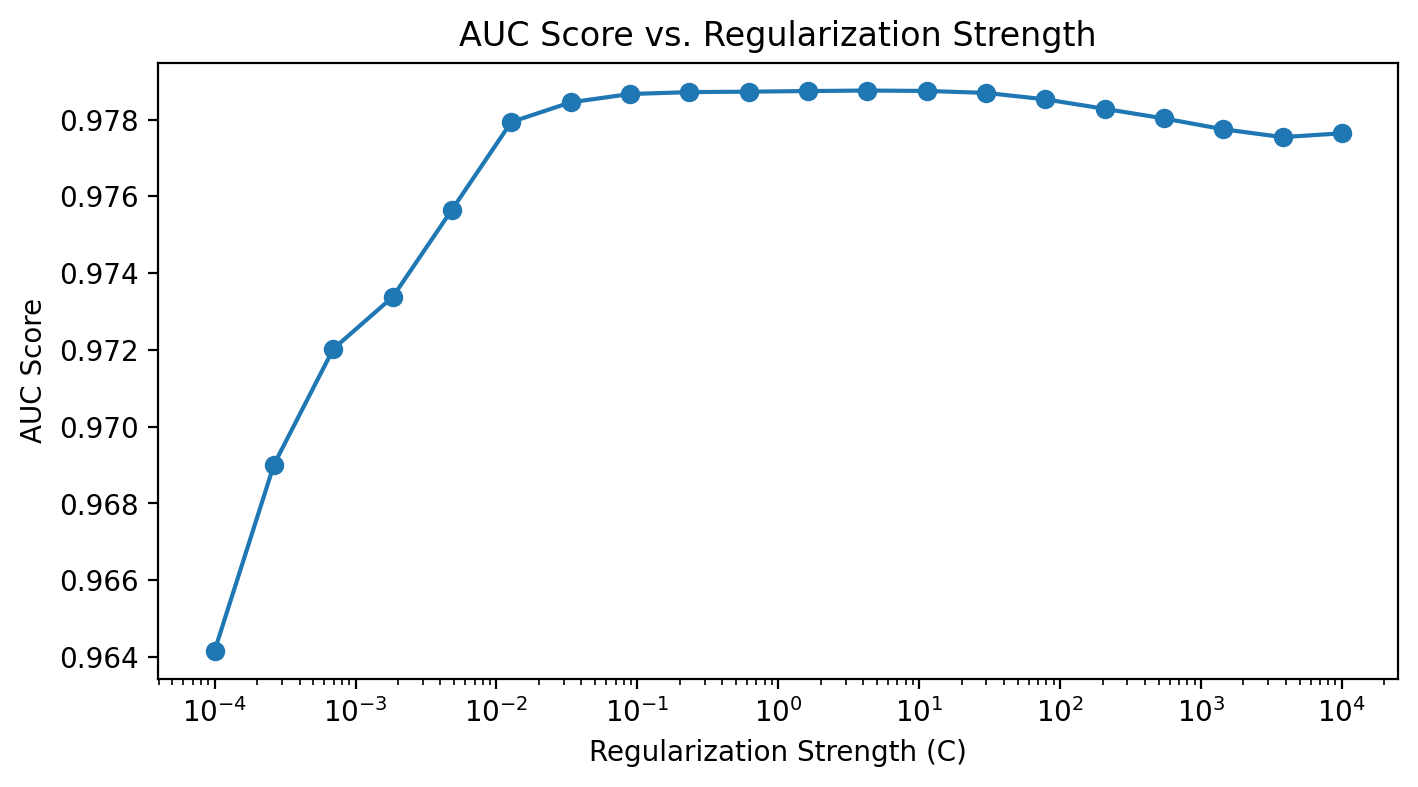

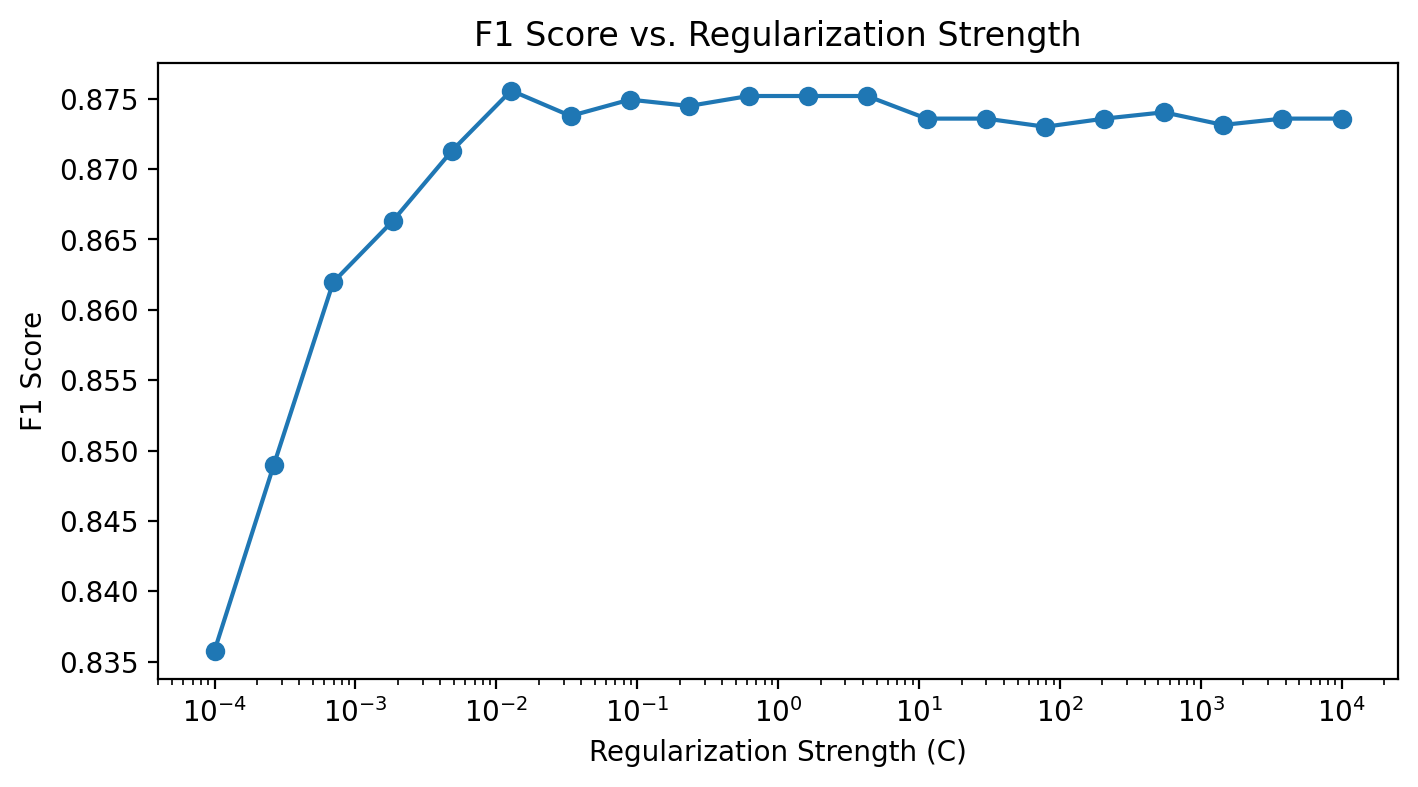

<Figure size 640x480 with 0 Axes>

In [46]:
def plot_metric(C_values, metric_values, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.plot(C_values, metric_values, marker="o")  # Add marker for each point
    plt.xscale("log")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


# Plot Non-Zero Parameters
plot_metric(
    C_values,
    nonzero_params,
    "Non-Zero Parameters vs. Regularization Strength",
    "Regularization Strength (C)",
    "Number of Non-Zero Parameters",
)

# Plot Cross Entropy Loss
plot_metric(
    C_values,
    cross_entropy_losses,
    "Cross Entropy Loss vs. Regularization Strength",
    "Regularization Strength (C)",
    "Cross Entropy Loss",
)

# Plot AUC Score
plot_metric(
    C_values,
    auc_scores,
    "AUC Score vs. Regularization Strength",
    "Regularization Strength (C)",
    "AUC Score",
)

# Plot F1 Score
plot_metric(
    C_values,
    f1_scores,
    "F1 Score vs. Regularization Strength",
    "Regularization Strength (C)",
    "F1 Score",
)

plt.tight_layout()
plt.show()

>From the above 4 plots, we can interpret as follow:

>**Non-Zero Parameters vs. Regularization Strength**: Initially, with strong regularization (high $C$ values), the model starts with fewer non-zero parameters. As regularization strength decreases ($C$ decreases), more parameters become non-zero. Around  $C=1$($C$=$10^0$), the number of non-zero parameters starts to level off, indicating that further reduction in regularization does not significantly increase model complexity.

>**Cross-Entropy Loss vs. Regularization Strength**: The loss rapidly decreases as we move towards $C=1$($C$=$10^0$) and then stabilizes. This suggests that $C=1$ provides a good balance between complexity and performance, minimizing the cross-entropy loss without overfitting.

>**AUC Score vs. Regularization Strength**: The AUC score improves significantly as regularization is reduced, with the score plateauing around $C=1$. This indicates that $C=1$ is the point where the model achieves a good trade-off between true positive rate and false positive rate.

>**F1 Score vs. Regularization Strength**: The F1 score increases with a decrease in regularization, indicating improved precision and recall, and it begins to level off near $C=1$. This suggests that $C=1$ is where the model reaches a good balance between precision and recall.

>From these observations, the plots suggest that a regularization strength corresponding to $C=1$($C$=$10^0$) is optimal as it achieves a balance between model complexity, generalization to new data, and performance across different metrics without significantly increasing the risk of overfitting.

**(d)** Train and test a (1) logistic regression classifier with minimal regularization (using the Scikit Learn package, set penalty='l1', C=1e100 to approximate this), (2) a logistic regression classifier with the best value of the regularization parameter from the last section, (3) a Linear Discriminant Analysis (LDA) Classifier, and (4) a Random Forest (RF) classifier (using default parameters for the LDA and RF classifiers). 
- Compare your classifiers' performance using ROC and Precision Recall (PR) curves. For the ROC curves, all your curves should be plotted on the same set of axes so that you can directly compare them. Please do the same wih the PR curves.
- Plot the line that represents randomly guessing the class (50% of the time a "3", 50% not a "3"). You SHOULD NOT actually create random guesses. Instead, you should think through the theory behind how ROC and PR curves work and plot the appropriate lines. It's a good practice to include these in ROC and PR curve plots as a reference point.
- For PR curves, an excellent resource on how to correctly plot them can be found [here](https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/) (ignore the section on "non-linear interpolation between two points"). This describes how a random classifier is represented in PR curves and demonstrates that it should provide a lower bound on performance.
- When training your logistic regression model, it's recommended that you use solver="liblinear"; otherwise, your results may not converge.

In [47]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

# (d)(1)
# Logistic Regression with Minimal Regularization
lr_minimal = LogisticRegression(penalty="l1", C=1e100, solver="liblinear")
lr_minimal.fit(X_train, y_train)

# (d)(2)
# Logistic Regression with Optimal Regularization
lr_optimal = LogisticRegression(penalty="l1", C=1, solver="liblinear")
lr_optimal.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [48]:
# (d)(3)
# Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [49]:
# (d)(4)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

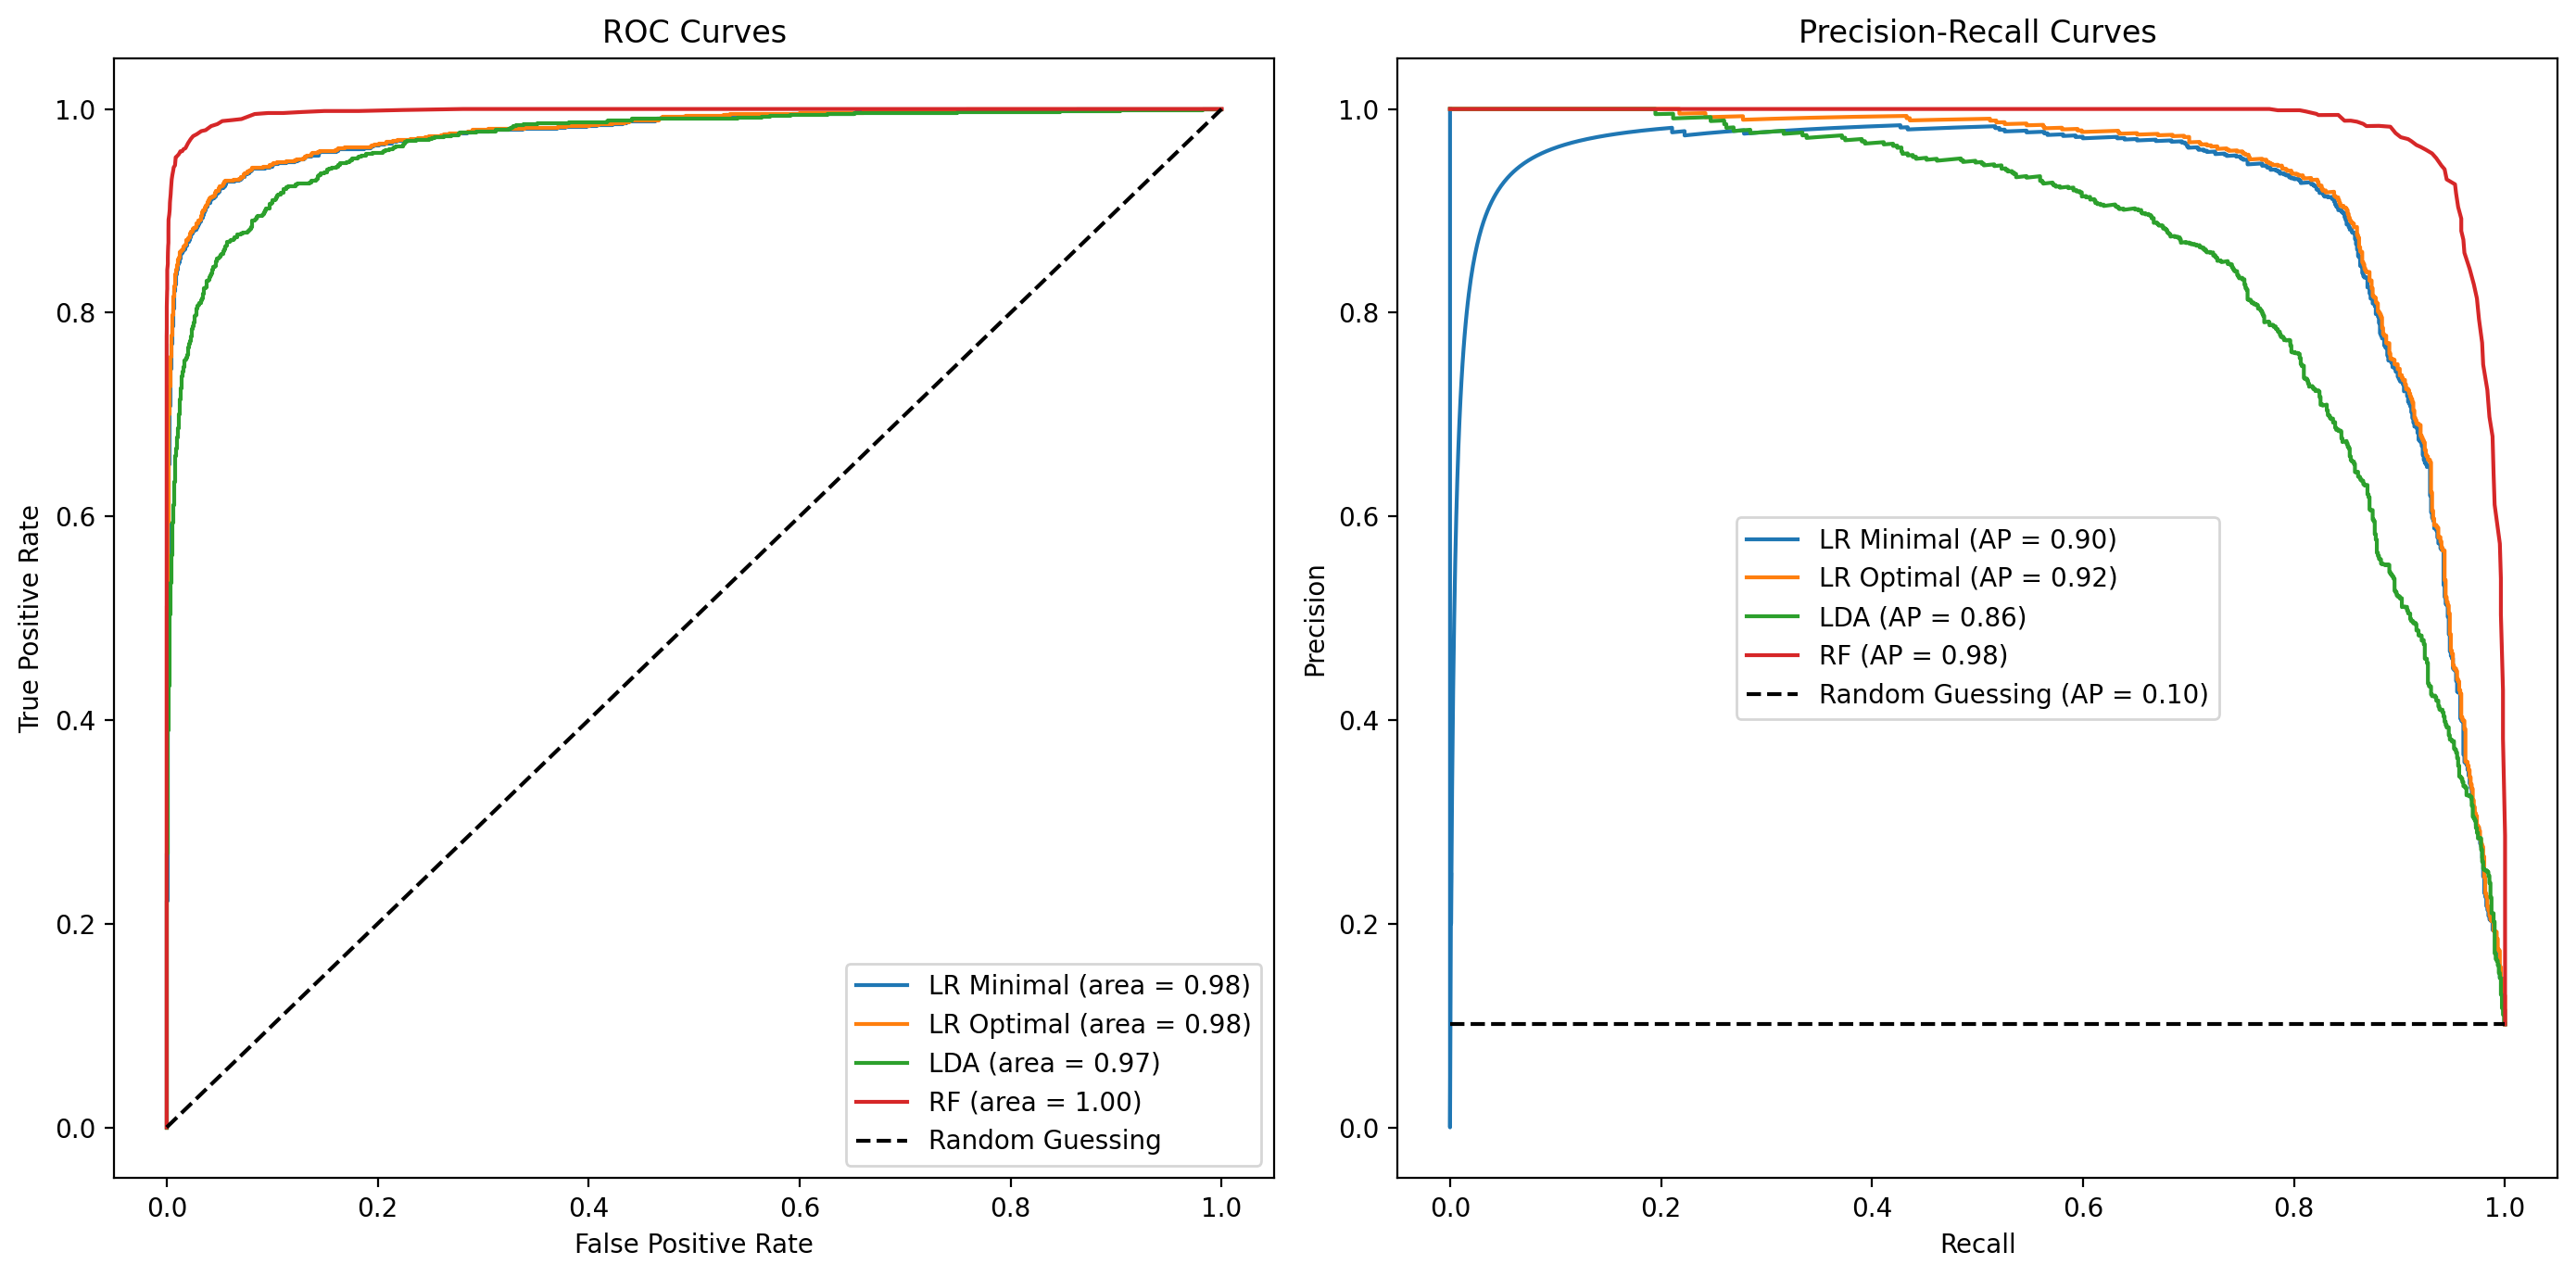

In [50]:
# compute ROC curve and PR curve metrics for each classifier

from sklearn.metrics import (
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
)

classifiers = [lr_minimal, lr_optimal, lda, rf]
classifier_names = ["LR Minimal", "LR Optimal", "LDA", "RF"]

plt.figure(figsize=(14, 7))

# ROC Curves
plt.subplot(1, 2, 1)
for clf, name in zip(classifiers, classifier_names):
    y_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (area = {roc_auc:.2f})")

# Random guessing line
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()

# PR Curves
plt.subplot(1, 2, 2)
for clf, name in zip(classifiers, classifier_names):
    y_proba = clf.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap_score = average_precision_score(y_test, y_proba)
    plt.plot(recall, precision, label=f"{name} (AP = {ap_score:.2f})")

# Line representing random guessing in PR curves
random_ap = y_test.mean()
plt.plot(
    [0, 1],
    [random_ap, random_ap],
    "k--",
    label="Random Guessing (AP = {:.2f})".format(random_ap),
)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()

plt.tight_layout()
plt.show()

>The ROC and Precision-Recall curves suggest that both logistic regression models and the Random Forest classifier perform excellently on the classification task. The Random Forest classifier exhibits superior performance with perfect scores, though logistic regression provides a strong balance between sensitivity and precision, with the "LR Optimal" model slightly outperforming the "LR Minimal" model. The Linear Discriminant Analysis is effective but slightly less so than the other models. Given these results, the Random Forest classifier would be the best choice for maximizing accuracy, while logistic regression would be preferred if model interpretability is a priority.